In [437]:
import sys
import time

if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")

In [438]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import ConfusionMatrixDisplay
# import seaborn as sns
# sns.set()
from sklearn import tree
from collections import Counter
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PowerTransformer
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
import seaborn as sns
from imblearn.over_sampling import SMOTE, ADASYN

In [439]:
filenames = {
    "emulab_hdd_merged": "emulab_d460_10Gbps_hdd_merged_V2.csv",
    "emulab_hdd_unmerged": "emulab_d460_10Gbps_hdd_unmerged_V2.csv",

    "utah_ssd_merged": "utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged": "utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv",

    "wisconsin_ssd_merged": "wisconsin_c220g1-10Gbps_ssd_merged_V2.csv",
    "wisconsin_ssd_unmerged": "wisconsin_c220g1-10Gbps_ssd_unmerged_V2.csv",

    "utah_ssd_merged_1g": "utah_c6525-25g_1Gbps_ssd_merged_V2.csv",
    "utah_ssd_unmerged_1g": "utah_c6525-25g_1Gbps_ssd_unmerged_V2.csv",

    "wisconsin_hdd_ssd_merged": "wisconsin_c220g1-10Gbps_hdd_ssd_merged_V2.csv",
    "wisconsin_hdd-ssd_unmerged": "wisconsin_c220g1-10Gbps_hdd_ssd_unmerged_V2.csv",
}


In [440]:
def model_factory(model_name):
    if model_name == "RandomForest":
        return RandomForestClassifier(n_estimators=100)
    elif model_name == "DecisionTreeClassifier":
        return DecisionTreeClassifier()
    elif model_name == "SVM":
        return  svm.SVC()
    elif model_name == "MLPNeuralNetwork":
        return MLPClassifier()
    elif model_name == "XGB":
        return XGBClassifier()
    else:
        return RandomForestClassifier(n_estimators=100)

In [279]:
emulab_hdd_merged = pd.read_csv(filenames.get('emulab_hdd_merged')).drop(['time_stamp', 'through_put'], axis=1)

wisconsin_ssd_merged = pd.read_csv(filenames.get('wisconsin_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)


In [280]:
df = wisconsin_ssd_merged
# np.round((sum(sum((df == 0).values))) / (len(df) * len(df.columns)),3)
df.shape

(24208, 117)

In [281]:
# df
len(dict(Counter(df[df.columns[len(df.columns) - 1]])))

21

In [283]:
y = df.label_value
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)

clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# print(metrics.confusion_matrix(y_test, y_pred))
score = np.round(clf.feature_importances_, 2)

# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))

(18156, 116)
(29127, 116)
99.49
Cummulative Importance Score: 
 [0.05 0.1  0.14 0.18 0.22 0.26 0.3  0.33 0.36 0.39 0.42 0.44 0.46 0.48
 0.5  0.52 0.54 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76
 0.77 0.78 0.79 0.8  0.81 0.82 0.83 0.84 0.85 0.86 0.87 0.88 0.89 0.9
 0.91 0.92 0.93 0.94 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95 0.95
 0.95 0.95 0.95 0.95]
Counter({0.0: 69, 0.01: 19, 0.02: 17, 0.04: 5, 0.03: 4, 0.05: 2})


In [285]:
features = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features.append(X.columns[i])
        # print(df.columns[i])
print(features)
print(len(features))


['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_req_active', 'sender_read_bytes', 'sender_ost_read', 'sender_ost_write', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']
28


In [441]:
features = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_waittime', 'sender_req_active', 'sender_read_bytes', 'sender_ost_read', 'sender_ost_write', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features =  ['sender_avg_rtt_value', 'sender_retrans','sender_segs_in', 'sender_seg_out', 'sender_req_waittime', 'sender_read_bytes', 'sender_write_bytes', 'sender_avg_waittime_md', 'sender_ost_read' , 'sender_ost_write','sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes','receiver_segs_in','receiver_seg_out', 'receiver_req_waittime', 'receiver_read_bytes', 'receiver_write_bytes', 'receiver_ost_read', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

In [290]:
y_new = df.label_value
X_new = df[features] #.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X_new,y_new)
print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

print(X_train.shape)
clf_new = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf_new.fit(X_train, y_train)
y_pred = clf_new.predict(X_test)
print(np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2))

(18156, 28)
(29316, 28)
99.12


In [442]:

# def update_labels_xgboost(df):
#     updated_labels = {0:0, 1:1, 10:2, 19:3, 28:4, 37:5,
#                       46:6, 55:7, 64:8, 73:9, 82:10, 91:11,
#                       100:12, 109:13, 113:14, 117:15, 129:16,
#                       133:17, 145:18, 151:19, 157:20}
#     y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
#     df["label_value"] = y
#     return df
# [ 91, 100, 46]
def update_labels_xgboost(df):
    updated_labels = {0:0, 1:1, 10:2, 19:3, 28:4, 37:5,
                      55:6, 64:7, 73:8, 82:9,
                     109:10, 113:11, 117:12, 129:13,
                      133:14, 145:15, 151:16, 157:17}
    y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

## TEST WITH DIFFERENT CLASSIFIRES MEREGD LEVELS - 21 labels

In [420]:
datasets = ['emulab_hdd_merged', 'utah_ssd_merged', 'wisconsin_ssd_merged', 'utah_ssd_merged_1g', 'wisconsin_hdd_ssd_merged']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 3
training_time = {}
remove_labels = [ 91, 100, 46]
import time
for clf_key in classifiers:
    accuracies = np.zeros(len(datasets))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            df = remove_labels_in_df(df, remove_labels)
            if clf_key == "XGB":
                df = update_labels_xgboost(df)
            y = df.label_value
            X = df.drop(columns="label_value")[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            # clf = classifiers[clf_key]
            clf = model_factory(clf_key)
            clf = make_pipeline(StandardScaler(), clf)
            time_1 = time.time()
            clf.fit(X_train, y_train)
            time_2 = time.time()
            if training_time.get(clf_key):
                training_time.get(clf_key).append(time_2-time_1)
            else:
                training_time[clf_key] = [time_2-time_1]
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)
print(training_time)

run RandomForest model for dataset: emulab_hdd_merged
run RandomForest model for dataset: utah_ssd_merged
run RandomForest model for dataset: wisconsin_ssd_merged
run RandomForest model for dataset: utah_ssd_merged_1g
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
run RandomForest model for dataset: emulab_hdd_merged
run RandomForest model for dataset: utah_ssd_merged
run RandomForest model for dataset: wisconsin_ssd_merged
run RandomForest model for dataset: utah_ssd_merged_1g
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
run RandomForest model for dataset: emulab_hdd_merged
run RandomForest model for dataset: utah_ssd_merged
run RandomForest model for dataset: wisconsin_ssd_merged
run RandomForest model for dataset: utah_ssd_merged_1g
run RandomForest model for dataset: wisconsin_hdd_ssd_merged


run DecisionTreeClassifier model for dataset: emulab_hdd_merged
run DecisionTreeClassifier model for dataset: utah_ssd_merged
run DecisionTreeClassifier model fo

In [295]:
_21_labels_accs = all_accuracies
# {'RandomForest': array([95.614, 98.944, 97.074, 98.776, 97.536]), 'DecisionTreeClassifier': array([93.648, 97.23 , 94.22 , 98.36 , 96.126]), 'SVM': array([85.86 , 94.902, 93.404, 90.852, 94.856]), 'MLPNeuralNetwork': array([91.064, 97.82 , 95.668, 95.564, 97.388]), 'XGB': array([98.344, 98.768, 97.522, 99.07 , 98.042])}
# all_accuracies = {'RandomForest': np.array([95.68, 99.12, 97.39, 98.81, 96.98]), 'DecisionTreeClassifier': np.array([93.38, 97.37, 94.46, 97.6 , 95.75]), 'SVM': np.array([85.89, 95.33, 93.42, 90.31, 94.56]), 'MLPNeuralNetwork': np.array([91.45, 98.17, 95.62, 95.07, 97.75]), 'XGB': np.array([97.92, 98.83, 97.64, 99.33, 97.79])}

# with over smapling
# {'RandomForest': np.array([98.56, 99.85, 99.12, 99.82, 99.07]), 'DecisionTreeClassifier': np.array([97.29, 99.28, 97.99, 99.81, 98.32]), 'SVM': np.array([90.73, 98.46, 96.61, 98.3 , 97.69]), 'MLPNeuralNetwork': np.array([98.7 , 99.74, 98.26, 99.27, 98.98]), 'XGB': np.array([99.7 , 99.76, 99.41, 99.94, 99.01])}

#remove labels
# {'RandomForest': array([98.38666667, 99.80333333, 99.63666667, 99.86      , 99.09      ]), 'DecisionTreeClassifier': array([97.43      , 99.26      , 97.97666667, 99.88      , 98.04      ]), 'SVM': array([94.1       , 99.13      , 97.86333333, 99.52      , 97.58333333]), 'MLPNeuralNetwork': array([98.23666667, 99.70333333, 99.34      , 99.68333333, 99.08333333]), 'XGB': array([99.67333333, 99.77333333, 99.72      , 99.90666667, 99.26333333])}

In [431]:
# np.average([95.68, 99.12, 97.39, 98.81, 96.98])
# np.average([97.92, 98.83, 97.64, 99.33, 97.79])
# print(np.average([0.7868380546569824, 0.417910099029541, 0.35545897483825684, 0.34842419624328613, 0.354356050491333]))
# print(np.average([2.951751232147217, 1.601038932800293, 1.7936930656433105, 1.8401007652282715, 1.371891975402832]))
# accs = {'RandomForest': np.array([98.38666667, 99.80333333, 99.63666667, 99.86      , 99.09      ]), 'DecisionTreeClassifier': np.array([97.43      , 99.26      , 97.97666667, 99.88      , 98.04      ]), 'SVM': np.array([94.1       , 99.13      , 97.86333333, 99.52      , 97.58333333]), 'MLPNeuralNetwork': np.array([98.23666667, 99.70333333, 99.34      , 99.68333333, 99.08333333]), 'XGB': np.array([99.67333333, 99.77333333, 99.72      , 99.90666667, 99.26333333])}
#
# for key in accs.keys():
#     print(key, np.round(accs[key], 2))

RandomForest [98.39 99.8  99.64 99.86 99.09]
DecisionTreeClassifier [97.43 99.26 97.98 99.88 98.04]
SVM [94.1  99.13 97.86 99.52 97.58]
MLPNeuralNetwork [98.24 99.7  99.34 99.68 99.08]
XGB [99.67 99.77 99.72 99.91 99.26]


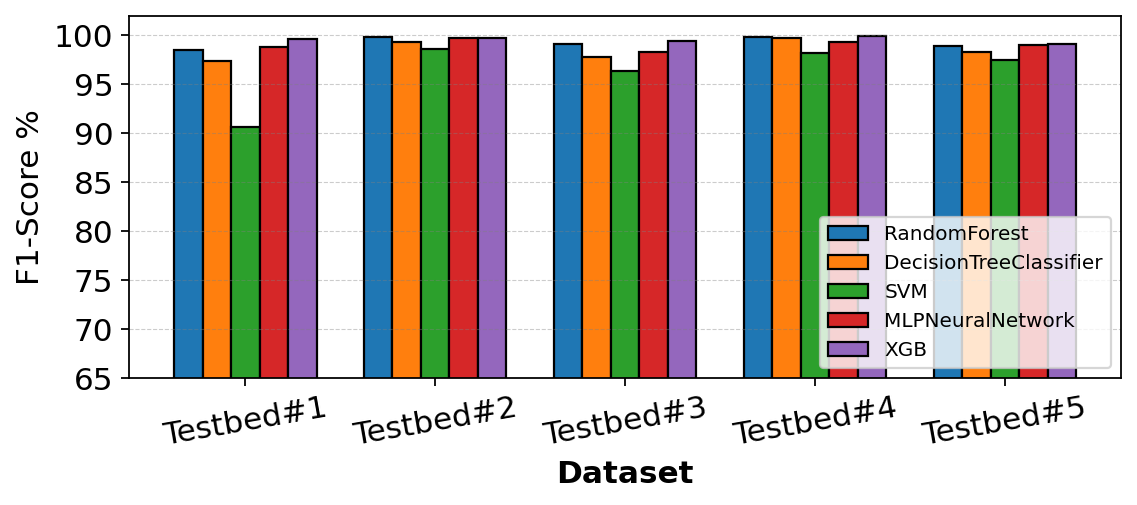

In [341]:
plt.rcParams.update({'font.size': 14})
# Figure Size
fig, ax = plt.subplots(figsize =(8, 3), dpi=160)
barWidth = 0.15

# Set position of bar on X axis
br1 = np.arange(len(datasets))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

ax.grid(visible = True, axis='y', color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('F1-Score %')
ax.set_ylim(ymin=65, ymax=102)


ax.bar(br1, all_accuracies['RandomForest'], width = barWidth, edgecolor ='black', label="RandomForest")
ax.bar(br2, all_accuracies['DecisionTreeClassifier'], width = barWidth, edgecolor ='black', label="DecisionTreeClassifier",)
ax.bar(br3, all_accuracies['SVM'], width = barWidth, edgecolor ='black', label="SVM", )
ax.bar(br4, all_accuracies['MLPNeuralNetwork'], width = barWidth, edgecolor ='black', label="MLPNeuralNetwork")
ax.bar(br5, all_accuracies['XGB'], width = barWidth, edgecolor ='black', label="XGB")


plt.xlabel('Dataset', fontweight ='bold')
plt.yticks(np.arange(65, 101, 5))
xticks = ['Testbed#1', 'Testbed#2', 'Testbed#3', 'Testbed#4', 'Testbed#5']
plt.xticks([r + 0.3 for r in range(len(br1))], xticks, rotation=10)

plt.legend(fontsize = 9, loc='lower right')
plt.savefig("21_labels_accuracies.pdf", bbox_inches='tight')

## TEST WITH DIFFERENT CLASSIFIRES UNMERGED LEVELS - 161 labels

In [345]:
# df = pd.read_csv(filenames.get('emulab_hdd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
df = pd.read_csv(filenames.get('wisconsin_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
print(df.shape)
print(len(dict(Counter(df[df.columns[len(df.columns) - 1]]))))
y = df.label_value
X = df.drop(columns="label_value")[features_2] # df[features]
# X = df.drop(columns="label_value")[features] # df[features]
# X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
# features_2 = []
# for i in range(len(score)):
#     if score[i] >= 0.02:
#         features_2.append(X.columns[i])
#         # print(df.columns[i])
# print(features_2)
# print(len(features_2))

(24208, 117)
161
(23023, 31)
93.42
Cummulative Importance Score: 
 [0.06 0.11 0.16 0.21 0.25 0.29 0.33 0.37 0.41 0.45 0.48 0.51 0.54 0.57
 0.6  0.63 0.66 0.69 0.72 0.75 0.78 0.8  0.82 0.84 0.86 0.88 0.9  0.92
 0.94 0.96 0.98]
Counter({0.03: 11, 0.02: 10, 0.04: 6, 0.05: 3, 0.06: 1})


In [452]:
# features_2 =['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_seg_out', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']
features_2 = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_byte_ack', 'sender_seg_out', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_req_waittime', 'sender_req_active', 'sender_ost_read', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_read_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_write_bytes']

In [454]:
def update_labels_xgboost_161_labels(df):
    #[ 91, 100, 46]
    updated_labels = {0: 0, 1: 1, 2: 2, 3: 3, 4: 4, 5: 5, 6: 6, 7: 7, 8: 8, 9: 9, 10: 10, 11: 11, 12: 12, 13: 13, 14: 14, 15: 15, 16: 16, 17: 17, 18: 18, 19: 19, 20: 20, 21: 21, 22: 22, 23: 23, 24: 24, 25: 25, 26: 26, 27: 27, 28: 28, 29: 29, 30: 30, 31: 31, 32: 32, 33: 33, 34: 34, 35: 35, 36: 36, 37: 37, 38: 38, 39: 39, 40: 40, 41: 41, 42: 42, 43: 43, 44: 44, 45: 45,

    55: 46, 56: 47, 57: 48, 58: 49, 59: 50, 60: 51, 61: 52, 62: 53, 63: 54, 64: 55, 65: 56, 66: 57, 67: 58, 68: 59, 69: 60, 70: 61, 71: 62, 72: 63, 73: 64, 74: 65, 75: 66, 76: 67, 77: 68, 78: 69, 79: 70, 80: 71, 81: 72, 82: 73, 83: 74, 84: 75, 85: 76, 86: 77, 87: 78, 88: 79, 89: 80, 90: 81,

    109: 82, 110: 83, 111: 84, 112: 85, 113: 86, 114: 87, 115: 88, 116: 89, 117: 90, 118: 91, 119: 92, 120: 93, 121: 94, 122: 95, 123: 96, 124: 97, 125: 98, 126: 99, 127: 100, 128: 101, 129: 102, 130: 103, 131: 104, 132: 105, 133: 106, 134: 107, 135: 108, 136: 109, 137: 110, 138: 111, 139: 112, 140: 113, 141: 114, 142: 115, 143: 116, 144: 117, 145: 118, 146: 119, 147: 120, 148: 121, 149: 122, 150: 123, 151: 124, 152: 125, 153: 126, 154: 127, 155: 128, 156: 129, 157: 130, 158: 131, 159: 132, 160: 133
    }
    y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [462]:
datasets = ['emulab_hdd_unmerged', 'utah_ssd_unmerged', 'wisconsin_ssd_unmerged', 'utah_ssd_unmerged_1g', 'wisconsin_hdd-ssd_unmerged']
# datasets = ['utah_ssd_unmerged_1g']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
round_number = 3
remove_labels = [ 91,92, 93, 94, 95,96, 97,98, 99,
                  100, 101, 102, 103, 104, 105, 106, 107, 108,
                  46, 47, 48, 49, 50, 51, 52, 53, 54 ]
for clf_key in classifiers:
    accuracies = np.zeros(len(datasets))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            df = remove_labels_in_df(df, remove_labels)
            if clf_key == "XGB":
                df = update_labels_xgboost_161_labels(df)
            y = df.label_value
            X = df.drop(columns="label_value")[features_2]#[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            # clf = classifiers[clf_key]
            clf = model_factory(clf_key)
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(accuracy)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)

run RandomForest model for dataset: emulab_hdd_unmerged
94.7
run RandomForest model for dataset: utah_ssd_unmerged
94.28
run RandomForest model for dataset: wisconsin_ssd_unmerged
93.36
run RandomForest model for dataset: utah_ssd_unmerged_1g
96.76
run RandomForest model for dataset: wisconsin_hdd-ssd_unmerged
93.33
run RandomForest model for dataset: emulab_hdd_unmerged
94.88
run RandomForest model for dataset: utah_ssd_unmerged
94.74
run RandomForest model for dataset: wisconsin_ssd_unmerged
93.07
run RandomForest model for dataset: utah_ssd_unmerged_1g
96.42
run RandomForest model for dataset: wisconsin_hdd-ssd_unmerged
93.74
run RandomForest model for dataset: emulab_hdd_unmerged
94.86
run RandomForest model for dataset: utah_ssd_unmerged
94.66
run RandomForest model for dataset: wisconsin_ssd_unmerged
92.86
run RandomForest model for dataset: utah_ssd_unmerged_1g
96.64
run RandomForest model for dataset: wisconsin_hdd-ssd_unmerged
93.57


run DecisionTreeClassifier model for datas

In [464]:
_161_labels_accs = all_accuracies

# all_accuracies = {'RandomForest': np.array([95.844, 94.296, 92.704, 96.604, 93.946]), 'DecisionTreeClassifier': np.array([85.112, 86.942, 78.36 , 91.38 , 81.472]), 'SVM': np.array([85.55 , 76.662, 70.888, 70.622, 73.66 ]), 'MLPNeuralNetwork': np.array([94.842, 89.602, 88.69 , 88.97 , 92.44 ]), 'XGB': np.array([94.798, 92.164, 90.5  , 95.022, 91.802])}

#with over sampling
# {'RandomForest': np.array([95.07, 94.94, 93.06, 97.32, 94.3 ]), 'DecisionTreeClassifier': np.array([85.41, 89.98, 82.11, 93.27, 84.59]), 'SVM': np.array([84.9 , 82.67, 72.54, 80.11, 74.87]), 'MLPNeuralNetwork': np.array([95.88, 92.7 , 92.77, 94.61, 94.97]), 'XGB': np.array([94.62, 92.07, 90.77, 94.31, 92.17])}
accs = {'RandomForest': np.array([94.81333333, 94.56      , 93.09666667, 96.60666667, 93.54666667]), 'DecisionTreeClassifier': np.array([86.49333333, 90.98666667, 84.11666667, 94.25      , 85.81333333]), 'SVM': np.array([86.65666667, 83.91333333, 76.73666667, 78.77333333, 77.96666667]), 'MLPNeuralNetwork': np.array([96.45333333, 93.56333333, 93.73666667, 93.91      , 95.46666667]), 'XGB': np.array([94.86      , 93.09666667, 92.39333333, 94.80333333, 92.57666667])}
for key in accs.keys():
    print(key, np.round(accs[key], 2))

RandomForest [94.81 94.56 93.1  96.61 93.55]
DecisionTreeClassifier [86.49 90.99 84.12 94.25 85.81]
SVM [86.66 83.91 76.74 78.77 77.97]
MLPNeuralNetwork [96.45 93.56 93.74 93.91 95.47]
XGB [94.86 93.1  92.39 94.8  92.58]


In [168]:
# np.mean([95.844, 94.296, 92.704, 96.604, 93.946])
# np.mean([94.798, 92.164, 90.5  , 95.022, 91.802])
# f = {'RandomForest': np.array([95.07, 94.94, 93.06, 97.32, 94.3 ]), 'DecisionTreeClassifier': np.array([85.41, 89.98, 82.11, 93.27, 84.59]), 'SVM': np.array([84.9 , 82.67, 72.54, 80.11, 74.87]), 'MLPNeuralNetwork': np.array([95.88, 92.7 , 92.77, 94.61, 94.97]), 'XGB': np.array([94.62, 92.07, 90.77, 94.31, 92.17])}



RandomForest 94.938
DecisionTreeClassifier 87.072
SVM 79.018
MLPNeuralNetwork 94.18599999999999
XGB 92.788


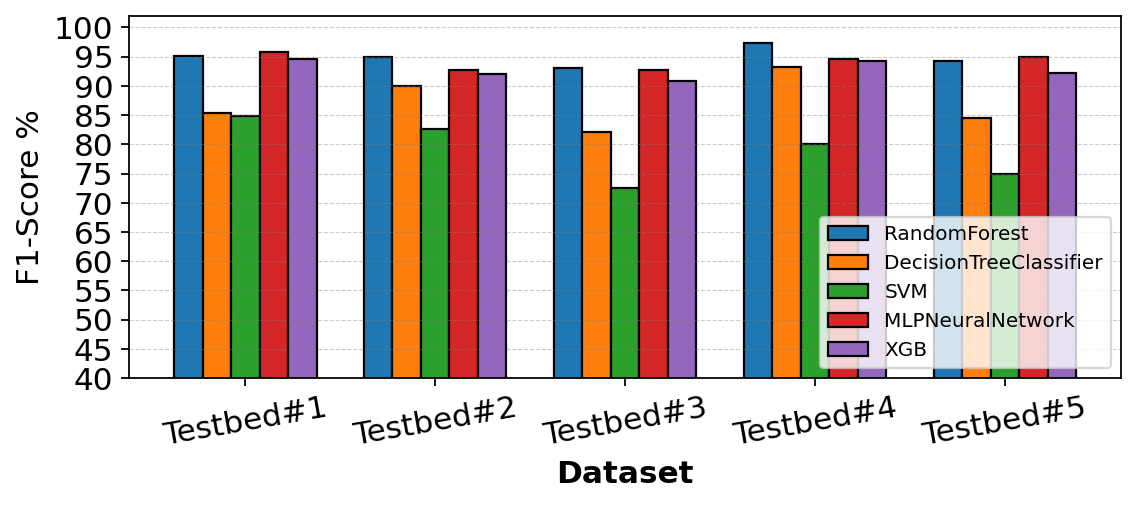

In [349]:
plt.rcParams.update({'font.size': 14})
# Figure Size
fig, ax = plt.subplots(figsize =(8, 3), dpi=160)
barWidth = 0.15

# Set position of bar on X axis
br1 = np.arange(len(datasets))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

ax.grid(visible = True, axis='y', color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('F1-Score %')
ax.set_ylim(ymin=65, ymax=102)


ax.bar(br1, all_accuracies['RandomForest'], width = barWidth, edgecolor ='black', label="RandomForest")
ax.bar(br2, all_accuracies['DecisionTreeClassifier'], width = barWidth, edgecolor ='black', label="DecisionTreeClassifier")
ax.bar(br3, all_accuracies['SVM'], width = barWidth, edgecolor ='black', label="SVM")
ax.bar(br4, all_accuracies['MLPNeuralNetwork'], width = barWidth, edgecolor ='black', label="MLPNeuralNetwork",)
ax.bar(br5, all_accuracies['XGB'], width = barWidth, edgecolor ='black', label="XGB")


plt.xlabel('Dataset', fontweight ='bold')
plt.yticks(np.arange(40, 101, 5))
xticks = ['Testbed#1', 'Testbed#2', 'Testbed#3', 'Testbed#4', 'Testbed#5']
plt.xticks([r + 0.3 for r in range(len(br1))], xticks, rotation=10)

plt.legend(fontsize = 9, loc='lower right')
plt.savefig("161_labels_accuracies.pdf", bbox_inches='tight')

## TEST WITH DIFFERENT CLASSIFIRES UNMERGED LEVELS - 5 labels


In [443]:
def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

def update_labels_xgboost_5cat(df):
    updated_labels = {0:0, 1:1, 55:2, 109:3, 145:4}
    y = [updated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df


In [239]:
# df = pd.read_csv(filenames.get('emulab_hdd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
df = pd.read_csv(filenames.get('wisconsin_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)
df.shape


# df = grouped_to_5_cat(df, 161)
df = group_to_5_cate_version2(df, 161)
print(df.shape)
print(len(dict(Counter(df[df.columns[len(df.columns) - 1]]))))

y = df.label_value
# X = df.drop(columns="label_value")[features_3] # df[features]
# X = df.drop(columns="label_value")[features] # df[features]
X = df.drop(columns="label_value") # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), SVC())
# clf = SVC()
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
score = np.round(clf.feature_importances_, 2)
# print(sorted(list(score), reverse=True))
print("Cummulative Importance Score: \n", np.cumsum(sorted(list(score), reverse=True)))
print(Counter(score))
features_3 = []
for i in range(len(score)):
    if score[i] >= 0.02:
        features_3.append(X.columns[i])
#         # print(df.columns[i])
print(features_3)
# print(len(features_3))

(24208, 125)
5
(31545, 124)
99.85
Cummulative Importance Score: 
 [0.07 0.13 0.19 0.24 0.29 0.34 0.38 0.42 0.46 0.49 0.52 0.55 0.58 0.61
 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.77 0.78 0.79 0.8  0.81 0.82 0.83
 0.84 0.85 0.86 0.87 0.88 0.89 0.9  0.91 0.92 0.93 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94
 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94 0.94]
Counter({0.0: 85, 0.01: 18, 0.02: 6, 0.03: 6, 0.04: 3, 0.05: 3, 0.06: 2, 0.07: 1})
['sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_avg_waittime_md', 'sender_sy

In [449]:
# features_3 = ['sender_avg_rtt_value', 'sender_pacing_rate', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_avg_waittime_md', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_vsize', 'receiver_cpu_usage_percentage', 'receiver_write_bytes', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

# features_3 = ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_retrans', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_req_active', 'receiver_write_bytes', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

features_3 = ['sender_cwnd_rate', 'sender_retrans', 'sender_segs_in', 'sender_avg_send_value', 'sender_unacked_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_tcp_rcv_buffer_min', 'receiver_tcp_rcv_buffer_max', 'receiver_req_waittime', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent', 'receiver_system_memory_percent']

In [447]:
# datasets = ['emulab_hdd_unmerged', 'utah_ssd_unmerged', 'wisconsin_ssd_unmerged', 'utah_ssd_unmerged_1g', 'wisconsin_hdd-ssd_unmerged']
datasets = ['emulab_hdd_merged', 'utah_ssd_merged', 'wisconsin_ssd_merged', 'utah_ssd_merged_1g', 'wisconsin_hdd_ssd_merged']
classifiers = {"RandomForest": RandomForestClassifier(n_estimators=100),
           "DecisionTreeClassifier": DecisionTreeClassifier(),
           "SVM": svm.SVC(),
           "MLPNeuralNetwork": MLPClassifier(),
           "XGB": XGBClassifier(),
        }
classifiers_legends = list(classifiers.keys())
all_accuracies = {}
remove_labels = [ 91, 100, 46]
round_number = 3
for clf_key in classifiers:
    accuracies = np.zeros(len(classifiers_legends))
    for i in range(round_number):
        temp_acc = np.array([])
        for key in datasets:
            print("run {} model for dataset: {}".format(clf_key.replace("\n", " "), key))
            df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
            df = remove_labels_in_df(df, remove_labels)
            # df = grouped_to_5_cat(df, 161)
            # if clf_key == "XGB":
            #     df = update_labels_xgboost_5cat(df)
            df = group_to_5_cate_version2(df, 161)
            y = df.label_value
            X = df.drop(columns="label_value")[features_3]#[features] # df[features]
            X_train, X_test, y_train, y_test = train_test_split(X,y)
            # print(X_train.shape)
            # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
            # print(X_train.shape)
            # clf = classifiers[clf_key]
            clf = model_factory(clf_key)
            clf = make_pipeline(StandardScaler(), clf)
            clf.fit(X_train, y_train)
            y_pred = clf.predict(X_test)
            accuracy = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(accuracy)
            temp_acc = np.append(temp_acc, accuracy)
        accuracies = np.add(accuracies, temp_acc)
    print("\n")
    accuracies = accuracies / round_number
    all_accuracies[clf_key] = accuracies

print(classifiers_legends)
print(datasets)
print(all_accuracies)

run RandomForest model for dataset: emulab_hdd_merged
99.11
run RandomForest model for dataset: utah_ssd_merged
99.92
run RandomForest model for dataset: wisconsin_ssd_merged
99.9
run RandomForest model for dataset: utah_ssd_merged_1g
99.55
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
99.59
run RandomForest model for dataset: emulab_hdd_merged
99.19
run RandomForest model for dataset: utah_ssd_merged
99.91
run RandomForest model for dataset: wisconsin_ssd_merged
99.8
run RandomForest model for dataset: utah_ssd_merged_1g
99.47
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
99.76
run RandomForest model for dataset: emulab_hdd_merged
98.9
run RandomForest model for dataset: utah_ssd_merged
99.91
run RandomForest model for dataset: wisconsin_ssd_merged
99.74
run RandomForest model for dataset: utah_ssd_merged_1g
99.6
run RandomForest model for dataset: wisconsin_hdd_ssd_merged
99.78


run DecisionTreeClassifier model for dataset: emulab_hdd_merged
98.41
run D

In [450]:
_5_labels_accs = all_accuracies
# all_accuracies = {'RandomForest': np.array([91.504, 97.802, 93.992, 98.874, 93.98 ]), 'DecisionTreeClassifier': np.array([85.612, 95.338, 90.472, 99.164, 88.704]), 'SVM': np.array([77.786, 84.252, 77.776, 91.288, 83.964]), 'MLPNeuralNetwork': np.array([81.892, 89.792, 84.51 , 92.894, 88.966]), 'XGB': np.array([98.428, 98.894, 94.154, 98.99 , 94.798])}
# with over sampling
# {'RandomForest': array([ 99.4 ,  99.89,  99.76, 100.  ,  99.35]), 'DecisionTreeClassifier': array([ 99.  ,  99.68,  99.36, 100.  ,  98.75]), 'SVM': array([90.24, 96.98, 96.84, 98.98, 97.37]), 'MLPNeuralNetwork': array([99.38, 99.71, 98.78, 99.92, 99.3 ]), 'XGB': array([99.98, 99.96, 99.97, 99.97, 99.54])}
#{'RandomForest': array([99.32 , 99.848, 99.768, 99.59 , 99.786]), 'DecisionTreeClassifier': array([98.526, 99.662, 99.194, 99.668, 99.5  ]), 'SVM': array([96.332, 99.3  , 98.576, 94.012, 98.88 ]), 'MLPNeuralNetwork': array([99.038, 99.808, 99.448, 97.616, 99.75 ]), 'XGB': array([99.89 , 99.892, 99.826, 99.692, 99.784])}

#remove labels
# accs = {'RandomForest': np.array([99.06666667, 99.91333333, 99.81333333, 99.54      , 99.71      ]), 'DecisionTreeClassifier': np.array([98.43      , 99.55333333, 99.02666667, 99.6       , 99.46666667]), 'SVM': np.array([95.74      , 99.07      , 98.29333333, 92.5       , 98.73333333]), 'MLPNeuralNetwork': np.array([98.89      , 99.73      , 99.41666667, 97.34      , 99.72666667]), 'XGB': np.array([99.85333333, 99.84666667, 99.73666667, 99.66      , 99.81666667])}
#
# for key in accs.keys():
#     print(key, np.round(accs[key], 2))

RandomForest [99.07 99.91 99.81 99.54 99.71]
DecisionTreeClassifier [98.43 99.55 99.03 99.6  99.47]
SVM [95.74 99.07 98.29 92.5  98.73]
MLPNeuralNetwork [98.89 99.73 99.42 97.34 99.73]
XGB [99.85 99.85 99.74 99.66 99.82]


In [172]:
# t = {'RandomForest': np.array([ 99.4 ,  99.89,  99.76, 100.  ,  99.35]), 'DecisionTreeClassifier': np.array([ 99.  ,  99.68,  99.36, 100.  ,  98.75]), 'SVM': np.array([90.24, 96.98, 96.84, 98.98, 97.37]), 'MLPNeuralNetwork': np.array([99.38, 99.71, 98.78, 99.92, 99.3 ]), 'XGB': np.array([99.98, 99.96, 99.97, 99.97, 99.54])}
#
# for f in t.keys():
#     print(f, np.mean(t[f]))

RandomForest 99.67999999999999
DecisionTreeClassifier 99.358
SVM 96.08200000000001
MLPNeuralNetwork 99.418
XGB 99.884


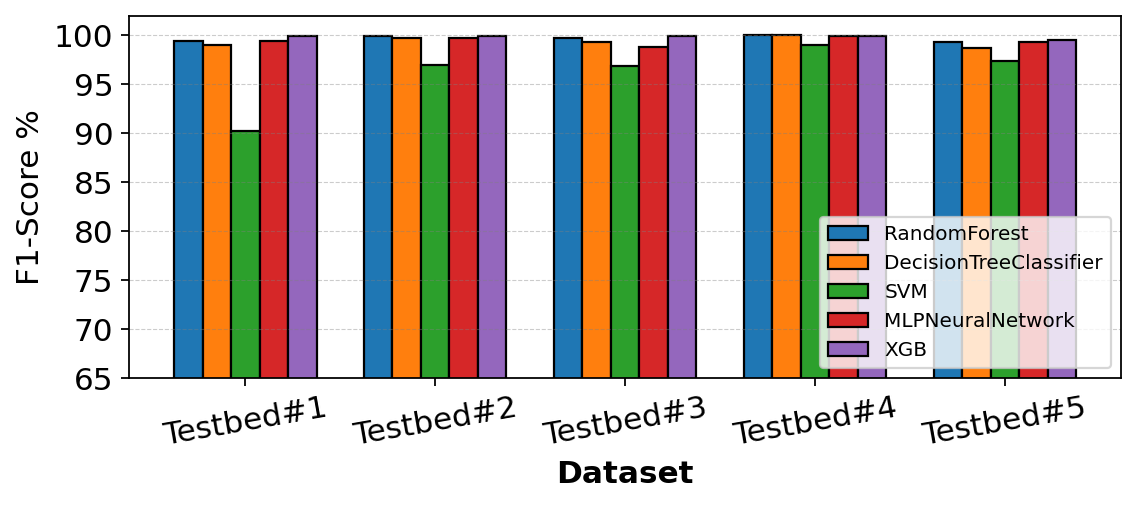

In [339]:
plt.rcParams.update({'font.size': 14})
# Figure Size
fig, ax = plt.subplots(figsize =(8, 3), dpi=160)
barWidth = 0.15

# Set position of bar on X axis
br1 = np.arange(len(datasets))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]

ax.grid(visible = True, axis='y', color ='grey', linestyle ='--', linewidth = 0.5, alpha = 0.4)
ax.set_ylabel('F1-Score %')
ax.set_ylim(ymin=70, ymax=102)


ax.bar(br1, all_accuracies['RandomForest'], width = barWidth, edgecolor ='black', label="RandomForest")
ax.bar(br2, all_accuracies['DecisionTreeClassifier'], width = barWidth, edgecolor ='black', label="DecisionTreeClassifier")
ax.bar(br3, all_accuracies['SVM'], width = barWidth, edgecolor ='black', label="SVM")
ax.bar(br4, all_accuracies['MLPNeuralNetwork'], width = barWidth, edgecolor ='black', label="MLPNeuralNetwork")
ax.bar(br5, all_accuracies['XGB'], width = barWidth, edgecolor ='black', label="XGB")


plt.xlabel('Dataset', fontweight ='bold')
plt.yticks(np.arange(65, 101, 5))
xticks = ['Testbed#1', 'Testbed#2', 'Testbed#3', 'Testbed#4', 'Testbed#5']
plt.xticks([r + 0.3 for r in range(len(br1))], xticks,  rotation=10)
plt.legend(fontsize = 9, loc='lower right')

plt.savefig("5_labels_accuracies.pdf", bbox_inches='tight')

## Overhead analysis

In [ ]:
sender_overhead = pd.read_csv("/Users/ehsan/Documents/phd/cloudLabLogs/overhead/sender/overhead_footprints.csv")
receiver_overhead = pd.read_csv("/Users/ehsan/Documents/phd/cloudLabLogs/overhead/receiver/overhead_footprints.csv")

In [8]:
sender_overhead.head(n=1)

,1651788228.2362200,0.048239946365356400,0,0.0,0.016891201284861200
0,1.651788e+09,0.044028,4084,5.9,0.017113


In [9]:
# Counter(receiver_overhead.iloc[:, 3])
# np.nanstd(receiver_overhead.iloc[:, 3])
np.mean(sender_overhead.iloc[1:, 1])

0.04517000447148862

In [10]:
CPU_footprints = np.array([])
CPU_std = np.array([])

Mem_footprints = np.array([])
Mem_std = np.array([])

collection_time = np.array([])
collection_time_std = np.array([])

payload_size = np.array([])
payload_size_std = np.array([])

collection_time = np.append(collection_time, np.mean(sender_overhead.iloc[1:, 1]))
collection_time_std = np.append(collection_time_std, np.nanstd(sender_overhead.iloc[1:, 1]))
collection_time = np.append(collection_time, np.mean(receiver_overhead.iloc[1:, 1]))
collection_time_std = np.append(collection_time_std, np.nanstd(receiver_overhead.iloc[1:, 1]))

payload_size = np.append(payload_size, np.mean(sender_overhead.iloc[1:, 2]))
payload_size_std = np.append(payload_size_std, np.nanstd(sender_overhead.iloc[1:, 2]))
payload_size = np.append(payload_size, np.mean(receiver_overhead.iloc[1:, 2]))
payload_size_std = np.append(payload_size_std, np.nanstd(receiver_overhead.iloc[1:, 2]))

CPU_footprints = np.append(CPU_footprints, np.mean(sender_overhead.iloc[1:, 3]))
CPU_std = np.append(CPU_std, np.nanstd(sender_overhead.iloc[1:, 3]))
CPU_footprints = np.append(CPU_footprints, np.mean(receiver_overhead.iloc[1:, 3]))
CPU_std = np.append(CPU_std, np.nanstd(receiver_overhead.iloc[1:, 3]))


Mem_footprints = np.append(Mem_footprints, np.mean(sender_overhead.iloc[1:, 4]))
Mem_std = np.append(Mem_std, np.nanstd(sender_overhead.iloc[1:, 4]))
Mem_footprints = np.append(Mem_footprints, np.mean(receiver_overhead.iloc[1:, 4]))
Mem_std = np.append(Mem_std, np.nanstd(receiver_overhead.iloc[1:, 4]))

data = np.array([CPU_footprints, Mem_footprints, collection_time, payload_size])
print(data)

[[1.74782609e+00 1.94067797e+00]
 [1.70680859e-02 1.71337074e-02]
 [4.51700045e-02 5.05474159e-02]
 [4.07264348e+03 4.31992373e+03]]


In [13]:
print(np.mean(data[0]))
print(np.mean(data[1]))
print(np.mean(data[2]))
print(np.mean(data[3]))

1.8442520265291082
0.017100896642522963
0.04785871019939682
4196.283603537215


In [ ]:
plt.rcParams.update({'font.size': 18})

fig, ax = plt.subplots(figsize =(4, 5), dpi=160)
# fig.suptitle('Monitoring agent\'s Resource Usage footprints')
ax.bar(['Sender', 'Receiver'], data[0], label='Core CPU Usage (%)')
ax.set_ylabel('Ave. Core CPU Usage (%)')
# ax.set_xlabel('Transfer Side')

fig2, ax2 = plt.subplots(figsize =(4, 5), dpi=160)
ax2.bar(['Sender', 'Receiver'], data[1], label='Memory Usage (%)')
ax2.set_ylabel('Ave. Memory Usage (%)')
# ax2.set_xlabel('Transfer Side')

fig3, ax3 = plt.subplots(figsize =(4, 5), dpi=160)
ax3.bar(['Sender', 'Receiver'], data[2], label='Time (s)')
ax3.set_ylabel('Ave. data collection time (s)')
# ax3.set_xlabel('Transfer Side')

fig4, ax4 = plt.subplots(figsize =(4, 5), dpi=160)
ax4.bar(['Sender', 'Receiver'], data[3], label='Size (bytes)')
ax4.set_ylabel('Ave.  payload size (bytes)')

# plt.show()

## Transfer Learning


In [118]:
filenames_merged = {
    "emulab_hdd_merged": "emulab_d460_10Gbps_hdd_merged_V2.csv",
    # "emulab_hdd_unmerged": "emulab_d460_10Gbps_hdd_unmerged_V2.csv",

    "utah_ssd_merged": "utah_c6525-25g_25Gbps_ssd_merged_V2.csv",
    # "utah_ssd_unmerged": "utah_c6525-25g_25Gbps_ssd_unmerged_V2.csv",

    "wisconsin_ssd_merged": "wisconsin_c220g1-10Gbps_ssd_merged_V2.csv",
    # "wisconsin_ssd_unmerged": "wisconsin_c220g1-10Gbps_ssd_unmerged_V2.csv",

    "utah_ssd_merged_1g": "utah_c6525-25g_1Gbps_ssd_merged_V2.csv",
    # "utah_ssd_unmerged_1g": "utah_c6525-25g_1Gbps_ssd_unmerged_V2.csv",

    "wisconsin_hdd_ssd_merged": "wisconsin_c220g1-10Gbps_hdd_ssd_merged_V2.csv",
    # "wisconsin_hdd-ssd_unmerged": "wisconsin_c220g1-10Gbps_hdd_ssd_unmerged_V2.csv",
}
data = {}

In [119]:


def read_file(transform=False):
    global data, filenames_merged

    for key in filenames_merged:
        df = pd.read_csv(filenames[key])
        df = df.sort_values(by=['label_value']).reset_index().drop(['index','time_stamp', 'through_put'], axis=1)
        df.fillna(df.groupby(['label_value'], as_index=False).mean(), inplace=True)

        if transform:
            for index, row in features.iterrows():
                df[row['feature']] = df[row['feature']] / df[row['normalizer']]

        df.replace([np.inf, -np.inf, np.nan], 0, inplace=True)
        data[key] = df

read_file()

In [50]:
feature_list = features
for key in data:
    df = data[key].copy()
    y = df.label_value
    X = df#[feature_list]
    clf = make_pipeline(StandardScaler(),  RandomForestClassifier(n_estimators=100)) #RandomForestClassifier(n_estimators=100)
    cv_res = np.round(cross_val_score(clf, X, y, cv=10, scoring="f1_weighted"),4)
    print(f'{key} ==>{cv_res}')
    print(f'{key} ==> mean: {np.round(np.mean(cv_res)*100, 2)}, std: {np.round(np.std(cv_res)*100, 2)}')

KeyboardInterrupt: 

In [445]:
def change_labels_5(y, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y_new = np.array([aggregated_labels[int(i)] for i in y])
    return y_new

def grouped_to_5_cat(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    # 0 is normal and is one group itself
    # # group read together
    for i in range(1, 55):
        aggregated_labels.update({i: 1})

    # group write together
    for i in range(55, 109):
        aggregated_labels.update({i: 55})
    # group networks together
    for i in range(109, 145):
        aggregated_labels.update({i: 109})
    # group tcp configs together
    for i in range(145, 157):
        aggregated_labels.update({i: 145})
    # group with networks together
    for i in range(157, 161):
        aggregated_labels.update({i: 109})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

def remove_labels_in_df(df, labels_values):
    for lbl in labels_values:
        df = df.drop(df[df.label_value == lbl].index)
    return df

In [446]:
def group_to_5_cate_version2(df, total_possible_labels):
    aggregated_labels = {}
    for i in range(total_possible_labels + 1):
        aggregated_labels[i] = i
    normal_labels = [0]
    for i in normal_labels:
        aggregated_labels.update({i: 0})
    sender_io_labels = [1, 10, 37, 55, 64, 91]
    for i in sender_io_labels:
        aggregated_labels.update({i: 1})
    receiver_io_labels = [19, 28, 46, 73, 82, 100]
    for i in receiver_io_labels:
        aggregated_labels.update({i: 2})
    network_labels = [109, 113, 117, 129, 133, 157]
    for i in network_labels:
        aggregated_labels.update({i: 3})
    buffer_value_labels = [145, 151]
    for i in buffer_value_labels:
        aggregated_labels.update({i: 4})
    y = [aggregated_labels[int(i)] for i in df[df.columns[len(df.columns) - 1]].values]
    df["label_value"] = y
    return df

In [421]:

#19 features
# feature_list = ['sender_seg_out', 'sender_segs_in', 'sender_avg_send_value', 'sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_req_active', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#14features
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_tcp_snd_buffer_max', 'sender_read_bytes', 'sender_ost_read', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_write_bytes', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes']

#18 features
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes']


feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
                'receiver_segs_in',
                'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
                'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
                #'sender_segs_in',
                'sender_retrans', 'sender_cwnd_rate',
                'receiver_tcp_rcv_buffer_max',
                #------------
                #'sender_tcp_snd_buffer_max',
                #'sender_tcp_snd_buffer_min',
                'receiver_read_bytes_io',
                'receiver_ost_read',

                'sender_write_bytes',
                'receiver_read_bytes',
                ]

# feature_list = ['sender_seg_out', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'receiver_segs_in',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
#                 #'sender_segs_in',
#                 'sender_retrans', 'sender_cwnd_rate',
#                 'receiver_tcp_rcv_buffer_max',
#                 # 'sender_tcp_snd_buffer_max',
#                 #'sender_tcp_snd_buffer_min'
#                 ]
# feature_list = ['sender_segs_in','sender_send_buffer_value', 'sender_tcp_snd_buffer_min', 'sender_tcp_snd_buffer_max', 'sender_req_active', 'receiver_seg_out', 'receiver_read_bytes_io', 'receiver_req_active']

In [ ]:
# #BEST SO FAR
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes']

# ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active', 'sender_segs_in']

# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value',
#                 'sender_req_active', 'receiver_req_active',
#                 #'sender_segs_in',
#                 'sender_retrans', 'sender_cwnd_rate']

#
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes',
#                 'receiver_segs_in',
#                 'sender_pending_read_pages', 'sender_read_RPCs_in_flight',
#                 'sender_send_buffer_value', 'sender_req_active', 'receiver_req_active',
#                 #'sender_segs_in',
#                 'sender_retrans', 'sender_cwnd_rate',
#                 'receiver_tcp_rcv_buffer_max',
#                 #------------
#                 #'sender_tcp_snd_buffer_max',
#                 #'sender_tcp_snd_buffer_min',
#                 'receiver_read_bytes_io',
#                 'receiver_ost_read',
#                 ]

In [422]:
# def normalize_df(df):
#     df["sender_seg_out"] = df["sender_seg_out"] / df[df.label_value == 0].sender_seg_out.mean()
#     df["sender_avg_send_value"] = df["sender_avg_send_value"] / df[df.label_value == 0].sender_avg_send_value.mean()
#     df["sender_ost_read"] = df["sender_ost_read"] / df[df.label_value == 0].sender_ost_read.mean()
#     df["sender_read_bytes"] = df["sender_read_bytes"] / df[df.label_value == 0].sender_read_bytes.mean()
#     df["sender_remote_ost_read_bytes"] = df["sender_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()
#     df["sender_remote_ost_write_bytes"] = df["sender_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()
#     df["receiver_segs_in"] = df["receiver_segs_in"] / df[df.label_value == 0].receiver_segs_in.mean()
#     df["receiver_write_bytes"] = df["receiver_write_bytes"] / df[df.label_value == 0].receiver_write_bytes.mean()
#     df["receiver_remote_ost_read_bytes"] = df["receiver_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()
#     df["receiver_ost_write"] = df["receiver_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean()
#     df["receiver_remote_ost_write_bytes"] = df["receiver_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()
#
#     return df
def normalize_df(df):
    df['sender_retrans'] = df['sender_retrans'] / df[df.label_value == 0].sender_seg_out.mean()
    # df.loc[df.sender_seg_out==0, 'sender_seg_out']= 1
    # df['sender_retrans'] = df['sender_retrans'] / df[df.label_value == 0].sender_seg_out
    # TODO: CORRECT THIS
    # df["sender_remote_ost_write_bytes"] = df["sender_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()
    # # TODO: CORRECT THIS
    # df["receiver_remote_ost_read_bytes"] = df["receiver_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()
    # # TODO CORRECT THIS
    # df["sender_ost_write"] = df["sender_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean()

    # df.loc[df.sender_seg_out==0, 'sender_seg_out']= 1
    df["sender_seg_out"] = df["sender_seg_out"] / df[df.label_value == 0].sender_seg_out.mean()
    df["sender_avg_send_value"] = df["sender_avg_send_value"] / df[df.label_value == 0].sender_avg_send_value.mean()
    df["sender_ost_read"] = df["sender_ost_read"] / df[df.label_value == 0].sender_ost_read.mean()
    df["sender_read_bytes"] = df["sender_read_bytes"] / df[df.label_value == 0].sender_read_bytes.mean()
    df["sender_remote_ost_read_bytes"] =df["sender_remote_ost_read_bytes"] / df[df.label_value == 0].sender_remote_ost_read_bytes.mean()
    df["receiver_segs_in"] = df["receiver_segs_in"] / df[df.label_value == 0].receiver_segs_in.mean()
    df["receiver_write_bytes"] = df["receiver_write_bytes"] / df[df.label_value == 0].receiver_write_bytes.mean()
    df["receiver_ost_write"] = df["receiver_ost_write"] / df[df.label_value == 0].receiver_ost_write.mean()
    df["receiver_remote_ost_write_bytes"] = df["receiver_remote_ost_write_bytes"] / df[df.label_value == 0].receiver_remote_ost_write_bytes.mean()
    #
    # df["sender_write_bytes_io"] = df["sender_write_bytes_io"] / df[df.label_value == 0].sender_write_bytes_io.mean()
    # df["sender_read_bytes_io"] = df["sender_read_bytes_io"] / df[df.label_value == 0].sender_read_bytes_io.mean()
    # df["receiver_write_bytes_io"] = df["receiver_write_bytes_io"] / df[df.label_value == 0].receiver_write_bytes_io.mean()

    #---------------
    # df["sender_ssthresh_value"] = df.sender_ssthresh_value / df.sender_cwnd_rate
    # df["sender_req_active"] = df["sender_req_active"] / df[df.label_value == 0].sender_req_active.mean()
    return df

In [428]:
transfer_learning_acc = []
rounds = 5
# 19, 28, 46, 73, 82, 100
remove_labels = [ 91, 100, 46 ]#[91, 100, 46, 109, 113, 117, 129, 133, 157 ]#  [ 91, 100, 46]#133, 145, 19
def prepare_df(df):
    df = remove_labels_in_df(df, remove_labels)
    # df = normalize_df(df)
    # df = grouped_to_5_cat(df,161)
    df = group_to_5_cate_version2(df,161)
    # df = update_labels_xgboost_5cat(df)
    y = df.label_value
    X = df[feature_list]#.drop(columns="label_value")#[feature_list] #.drop(columns="label_value")
    return X, y

for key1 in data:
    acc = np.array(np.zeros(len(data.keys())))
    for i in range(rounds):
        print("Round {}".format(i+1))
        df = data[key1].copy()
        X, y = prepare_df(df)
        X_train, X_test, y_train, y_test = train_test_split(X,y)
        # X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
        X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
        print(X_train.shape)
        clf = RandomForestClassifier(n_estimators=100)
        # clf = XGBClassifier()
        # clf = tree.DecisionTreeClassifier(max_depth=9)
        clf.fit(X_train, y_train)
        tmp_acc = np.array([])
        for key2 in data:
            # if key1 == key2:
            #     continueK
            df_test = data[key2].copy()
            X_test, y_test = prepare_df(df_test)
            y_pred = clf.predict(X_test)
            # np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
            f_score = np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)
            print(f"{key1} ==> {key2} - {f_score}")
            tmp_acc = np.append(tmp_acc, f_score)
        acc = np.add(acc, tmp_acc)
    acc = acc / rounds
    transfer_learning_acc.append(acc)
    print("\n")
transfer_learning_acc = np.array(transfer_learning_acc)

diag = np.diag_indices(len(data.keys()))
average_score = (np.sum(transfer_learning_acc) - np.sum(transfer_learning_acc[diag]) ) / (transfer_learning_acc.size - len(data.keys()))
average_score = np.round(average_score, 2)
print(average_score)

Round 1
(44315, 27)
emulab_hdd_merged ==> emulab_hdd_merged - 98.63
emulab_hdd_merged ==> utah_ssd_merged - 80.99
emulab_hdd_merged ==> wisconsin_ssd_merged - 82.64
emulab_hdd_merged ==> utah_ssd_merged_1g - 68.91
emulab_hdd_merged ==> wisconsin_hdd_ssd_merged - 87.55
Round 2
(44500, 27)
emulab_hdd_merged ==> emulab_hdd_merged - 98.65
emulab_hdd_merged ==> utah_ssd_merged - 83.58
emulab_hdd_merged ==> wisconsin_ssd_merged - 83.67
emulab_hdd_merged ==> utah_ssd_merged_1g - 67.21
emulab_hdd_merged ==> wisconsin_hdd_ssd_merged - 86.22
Round 3
(44230, 27)
emulab_hdd_merged ==> emulab_hdd_merged - 98.64
emulab_hdd_merged ==> utah_ssd_merged - 80.45
emulab_hdd_merged ==> wisconsin_ssd_merged - 81.62
emulab_hdd_merged ==> utah_ssd_merged_1g - 69.51
emulab_hdd_merged ==> wisconsin_hdd_ssd_merged - 89.36
Round 4
(44285, 27)
emulab_hdd_merged ==> emulab_hdd_merged - 98.64
emulab_hdd_merged ==> utah_ssd_merged - 81.87
emulab_hdd_merged ==> wisconsin_ssd_merged - 80.77
emulab_hdd_merged ==> utah_s

In [405]:
before_norm = transfer_learning_acc

71.25


[Text(0, 0.5, 'Tb #1'),
 Text(0, 1.5, 'Tb #2'),
 Text(0, 2.5, 'Tb #3'),
 Text(0, 3.5, 'Tb #4'),
 Text(0, 4.5, 'Tb #5')]

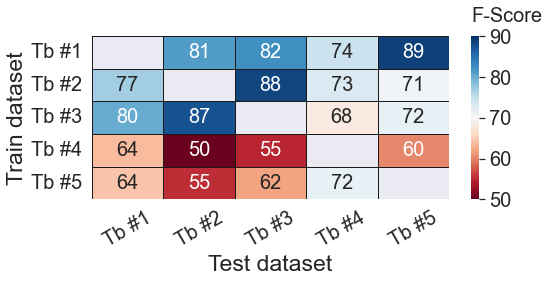

In [427]:
# before_norm = transfer_learning_acc

sns.set(rc={'figure.figsize':(8,3), 'font.size': 20})
print(average_score)
mask = np.zeros(before_norm.shape)
np.fill_diagonal(before_norm, np.nan)
ax = sns.heatmap(before_norm, annot=True,  vmin=50, vmax=90,linewidths=.5,cmap="RdBu", linecolor='k', fmt='.0f', mask=mask)
cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title("F-Score", fontsize=20, y=1.05, loc="left")

ax.set_xlabel('Test dataset', fontsize= 23)
ax.set_ylabel('Train dataset', fontsize= 23)
ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4", "Tb #5"]
ax.set_xticklabels(ticks_labels, rotation=30, fontsize= 20)
ax.set_yticklabels(ticks_labels, rotation=0, fontsize= 20)
# plt.savefig('TR_5cat_removedclasses_{}_score.pdf'.format(average_score), bbox_inches='tight')
# plt.savefig('TR_5cat_all21_{}_score.pdf'.format(average_score), bbox_inches='tight')

80.86


[Text(0, 0.5, 'Tb #1'),
 Text(0, 1.5, 'Tb #2'),
 Text(0, 2.5, 'Tb #3'),
 Text(0, 3.5, 'Tb #4'),
 Text(0, 4.5, 'Tb #5')]

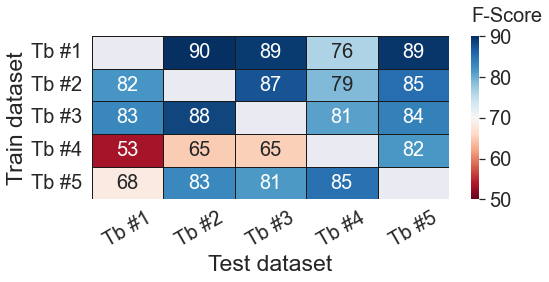

In [424]:
after_norm = transfer_learning_acc
sns.set(rc={'figure.figsize':(8,3), 'font.size': 20})
print(average_score)
mask = np.zeros(after_norm.shape)
np.fill_diagonal(after_norm, np.nan)

ax = sns.heatmap(after_norm, annot=True,  vmin=50, vmax=90,linewidths=.5,cmap="RdBu", linecolor='k', fmt='.0f',mask=mask)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=20)
cbar.ax.set_title("F-Score", fontsize=20, y=1.05, loc="left")

ax.set_xlabel('Test dataset', fontsize= 23)
ax.set_ylabel('Train dataset', fontsize= 23)
ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4", "Tb #5"]
ax.set_xticklabels(ticks_labels, rotation=30, fontsize= 20)
ax.set_yticklabels(ticks_labels, rotation=0, fontsize= 20)
# plt.savefig('TR_5cat_removedclasses_normal_{}_score.pdf'.format(average_score), bbox_inches='tight')
# plt.savefig('TR_5cat_all21_normal_{}_score.pdf'.format(average_score), bbox_inches='tight')

55.09


[Text(0, 0.5, 'Tb #1'),
 Text(0, 1.5, 'Tb #2'),
 Text(0, 2.5, 'Tb #3'),
 Text(0, 3.5, 'Tb #4'),
 Text(0, 4.5, 'Tb #5')]

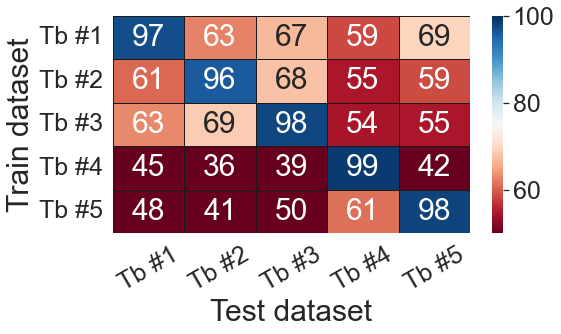

In [259]:
sns.set(rc={'figure.figsize':(8,4), 'font.size': 30})
print(average_score)
ax = sns.heatmap(transfer_learning_acc, annot=True,  vmin=50, vmax=100,linewidths=.5,cmap="RdBu", linecolor='k', fmt='.0f',)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=25)

ax.set_xlabel('Test dataset', fontsize= 30)
ax.set_ylabel('Train dataset', fontsize= 30)
ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4", "Tb #5"]
ax.set_xticklabels(ticks_labels, rotation=30, fontsize= 25)
ax.set_yticklabels(ticks_labels, rotation=0, fontsize= 25)
# plt.savefig('TR_5_18fe.pdf')

77.65


[Text(0, 0.5, 'Tb #1'),
 Text(0, 1.5, 'Tb #2'),
 Text(0, 2.5, 'Tb #3'),
 Text(0, 3.5, 'Tb #4'),
 Text(0, 4.5, 'Tb #5')]

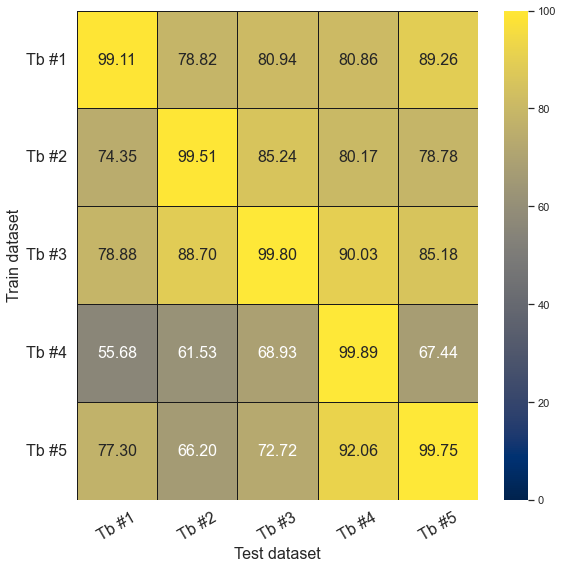

In [1257]:
sns.set(rc={'figure.figsize':(9,9), 'font.size': 16})
print(average_score)
ax = sns.heatmap(transfer_learning_acc, annot=True,  vmin=0, vmax=100, cmap="cividis",linewidths=0.5, linecolor='k', fmt='.2f')
ax.set_xlabel('Test dataset', fontsize= 16)
ax.set_ylabel('Train dataset', fontsize= 16)
ticks_labels = ["Tb #1", "Tb #2", "Tb #3", "Tb #4", "Tb #5"]
ax.set_xticklabels(ticks_labels, rotation=30, fontsize= 16)
ax.set_yticklabels(ticks_labels, rotation=0, fontsize= 16)

## TB 4 transfer learning

on the tree receiver segs in makes the wrong prediction classify it as 109

emulab_hdd_merged
utah_ssd_merged_1g ==> emulab_hdd_merged - 68.48
utah_ssd_merged
utah_ssd_merged_1g ==> utah_ssd_merged - 73.78
wisconsin_ssd_merged
utah_ssd_merged_1g ==> wisconsin_ssd_merged - 72.34
utah_ssd_merged_1g
utah_ssd_merged_1g ==> utah_ssd_merged_1g - 99.71
wisconsin_hdd_ssd_merged
utah_ssd_merged_1g ==> wisconsin_hdd_ssd_merged - 73.29




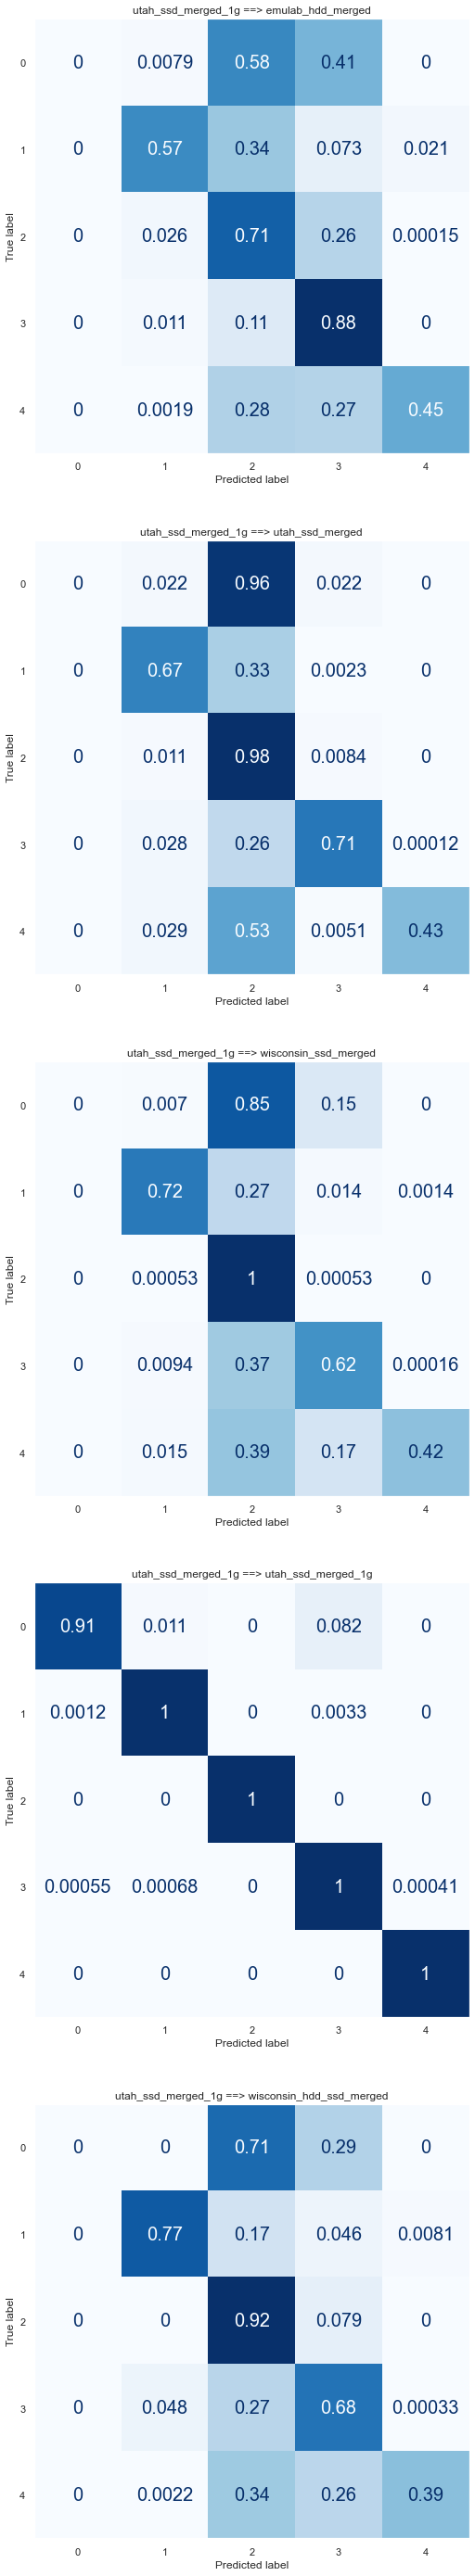

In [284]:
# creating confusion matrix for the chosen dataset and model
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix
transfer_learning_acc = []
fig, axes = plt.subplots(5,1, figsize=(10, 50))
plt.rcParams.update({'font.size': 20})
# feature_list = ['sender_seg_out', 'sender_avg_send_value', 'sender_read_bytes_io', 'sender_write_bytes_io', 'sender_ost_read', 'sender_ost_write', 'sender_pending_read_pages', 'sender_read_RPCs_in_flight', 'sender_remote_ost_read_bytes', 'sender_remote_ost_write_bytes', 'receiver_segs_in', 'receiver_write_bytes_io', 'receiver_ost_write', 'receiver_remote_ost_read_bytes', 'receiver_remote_ost_write_bytes', 'sender_read_bytes', 'receiver_write_bytes']
# 19, 28, 46, 73, 82, 100
labels_values = [ 91, 100, 46, 73]# [ 91, 100, 46, 109, 113, 117, 129, 133, 157 ]#[ 91, 100, 46]# [ 91, 100, 46, 145, 151, 129, 133, 117, 113, 109, 157]# #[117, 145, 109, 129, 113, 133, 157]#[ 91, 100, 46]# [133, 145, 91, 100, 19]
key1 = "utah_ssd_merged_1g"
# key1 = "wisconsin_ssd_merged"
# key1 = "utah_ssd_merged"
df = data[key1].copy()
df = remove_labels_in_df(df, labels_values)
df = normalize_df(df)
# df = grouped_to_5_cat(df,161)
df = group_to_5_cate_version2(df,161)
y = df.label_value
X = df[feature_list]#.drop(columns="label_value")#[feature_list] #.drop(columns="label_value")
X_train, X_test, y_train, y_test = train_test_split(X,y)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)

clf = RandomForestClassifier(n_estimators=100)
# clf = tree.DecisionTreeClassifier(max_depth=9)
clf.fit(X_train, y_train)
acc = np.array([])
for index, key2 in enumerate(data):
    print(key2)
    # if key1 == key2:
    #     continueK

    df_test = data[key2].copy()
    df_test = remove_labels_in_df(df_test, labels_values)
    df_test = normalize_df(df_test)
    # df_test = grouped_to_5_cat(df_test,161)
    df_test = group_to_5_cate_version2(df_test,161)
    y_test = df_test.label_value
    X_test = df_test[feature_list]#.drop(columns="label_value")#[feature_list]#.drop(columns="label_value")#.drop(columns="label_value")

    y_pred = clf.predict(X_test)
    # y_pred_5cat = change_labels_5(y_pred, 21)
    # y_test_5cat = change_labels_5(y_test, 21)
    np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
    print(f"{key1} ==> {key2} - {np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)}")
    acc = np.append(acc, np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2))

    axes[index].grid(False)
    axes[index].set_title(f"{key1} ==> {key2}")
    # axes[index].set_xlabel('True classes', fontsize=20)
    # axes[index].set_ylabel('Predicted classes', fontsize=20)
    disp = ConfusionMatrixDisplay.from_predictions(y_test, y_pred,
                                                   labels=clf.classes_, normalize='true',
                                                   cmap=plt.cm.Blues, ax=axes[index], colorbar=False )
    # np.round(metrics.accuracy_score(y_test_5cat, y_pred_5cat) * 100, 2)
    # print(f"{key1} ==> {key2} - {np.round(metrics.f1_score(y_test_5cat, y_pred_5cat, average='weighted') * 100, 2)}")
    # acc = np.append(acc, np.round(metrics.f1_score(y_test_5cat, y_pred_5cat, average='weighted') * 100, 2))
transfer_learning_acc.append(acc)
print("\n")
transfer_learning_acc = np.array(transfer_learning_acc)
# fig.savefig("confusion_matrix_tb4.jpg", dpi=100, bbox_inches='tight')

## RUN with montage application

In [55]:
wisconsin_ssd_merged = pd.read_csv(filenames.get('wisconsin_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)

# montage_df = pd.read_csv("normal.csv").drop(['time_stamp', 'through_put'], axis=1)
# wisconsin_ssd_merged = wisconsin_ssd_merged.append(montage_df, ignore_index=True)

df = wisconsin_ssd_merged

y = df.label_value
X = df.drop(columns="label_value")[features] # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
# X_train, y_train = RandomOverSampler(sampling_strategy="all").fit_resample(X_train, y_train)
# X_train, y_train = SMOTE().fit_resample(X_train, y_train) #(sampling_strategy="all").fit_resample(X_train, y_train)

print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), clf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))
# print(metrics.confusion_matrix(y_test, y_pred))

(18156, 28)
(18156, 28)
98.74


In [298]:
wisconsin_ssd_merged[['sender_ost_read','sender_remote_ost_read_bytes']]

,sender_ost_read,sender_remote_ost_read_bytes
0,9470926,532676608
1,9498585,536870912
2,9554871,541065216
3,9560776,536870912
4,9502055,536870912
...,...,...
24203,218169,33554432
24204,648334,100663296
24205,650127,100663296
24206,539851,83886080


In [12]:
normal = df.loc[df['label_value'] == 0]
y_pred = clf.predict(normal.drop(columns="label_value")[features])
# y_pred = clf.predict(normal.drop(columns="label_value"))
print(Counter(y_pred))

Counter({0: 139, 10: 3, 151: 1})


In [296]:
normal

,sender_avg_rtt_value,sender_pacing_rate,sender_cwnd_rate,sender_avg_retransmission_timeout_value,sender_byte_ack,sender_seg_out,sender_retrans,sender_ssthresh_value,sender_segs_in,sender_avg_send_value,...,receiver_setattr_md,receiver_read_page_md,receiver_unlink_md,receiver_avg_dsack_dups_value,receiver_avg_reord_seen,receiver_system_cpu_percent,receiver_system_memory_percent,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes,label_value
9005,0.329,0.0,591.0,201.0,526.314484,381531.0,0.0,548.0,3560.0,20808.9,...,0,0,0,0.0,0.0,4.1,1.6,0,549453072,0
9006,0.486,30502.1,641.0,201.0,523.164070,379582.0,0.0,548.0,3164.0,15278.5,...,0,0,0,0.0,0.0,4.5,1.7,0,532676608,0
9007,0.263,30502.1,659.0,201.0,525.744080,380493.0,0.0,548.0,3401.0,29026.1,...,0,0,0,0.0,0.0,4.5,1.7,0,528482304,0
9008,0.319,30502.1,667.0,201.0,521.473427,378001.0,0.0,548.0,3147.0,24221.1,...,0,0,0,0.0,0.0,4.4,1.8,0,528482304,0
9009,5.324,2071.3,476.0,206.0,368.986862,267381.0,1.0,474.0,2275.0,1035.7,...,1,0,0,0.0,0.0,3.7,1.9,0,494927872,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9143,0.402,23871.2,637.0,201.0,522.140564,378315.0,0.0,478.0,3600.0,18355.7,...,0,0,0,0.0,0.0,4.5,2.4,0,465567744,0
9144,0.368,23871.2,657.0,201.0,522.481987,378360.0,0.0,478.0,3406.0,20681.2,...,0,0,0,0.0,0.0,4.5,2.4,0,478150656,0
9145,0.313,23871.2,677.0,201.0,521.331459,377743.0,0.0,478.0,3178.0,25055.5,...,0,0,0,0.0,0.0,4.0,2.5,0,419430400,0
9146,0.271,23871.2,691.0,201.0,448.237671,324729.0,0.0,478.0,2943.0,29537.1,...,1,0,0,0.0,0.0,3.9,2.5,0,411041792,0


In [13]:
# montage_df = pd.read_csv("normal.csv").drop(['time_stamp', 'through_put'], axis=1)
montage_df = pd.read_csv("./montage_analysis/long_montage_5_instance.csv").drop(['time_stamp'], axis=1)
print(montage_df.shape)
# montage_df = montage_df.iloc[49:56]
# montage_df['sender_remote_ost_write_bytes']
montage_df_write_part = montage_df.loc[(montage_df['sender_remote_ost_write_bytes'] > 0)]
montage_df_write_part
montage_df

(239, 118)


,sender_avg_rtt_value,sender_pacing_rate,sender_cwnd_rate,sender_avg_retransmission_timeout_value,sender_byte_ack,sender_seg_out,sender_retrans,sender_ssthresh_value,sender_segs_in,sender_avg_send_value,...,receiver_read_page_md,receiver_unlink_md,receiver_avg_dsack_dups_value,receiver_avg_reord_seen,receiver_system_cpu_percent,receiver_system_memory_percent,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes,through_put,label_value
0,0.252,32161.8,350.0,201.0,528.000000,382595.0,0.0,102.0,3711.0,16088.9,...,0,0,0.0,0.0,4.0,1.8,0,494927872,3.072611,1002
1,0.504,21145.4,460.0,201.0,507.576744,368094.0,0.0,102.0,3301.0,10572.7,...,0,0,0.0,0.0,4.3,1.9,0,473956352,2.898157,1002
2,0.249,21145.4,533.0,201.0,345.753250,250423.0,0.0,102.0,1900.0,24796.3,...,0,0,0.0,0.0,3.6,1.9,0,473956352,3.193359,1002
3,0.248,21145.4,587.0,201.0,534.670006,387491.0,0.0,102.0,3502.0,27418.6,...,0,0,0.0,0.0,4.2,1.9,0,457179136,3.771484,1002
4,0.294,21145.4,621.0,201.0,526.802261,381665.0,0.0,102.0,3102.0,24468.2,...,0,0,0.0,0.0,4.1,2.0,0,465567744,3.746514,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.327,20618.5,557.0,201.0,451.581688,327366.0,0.0,446.0,3614.0,19731.8,...,0,0,0.0,0.0,3.8,8.1,0,469762048,3.182617,1002
235,0.623,20701.1,557.0,201.0,424.398834,307689.0,0.0,446.0,3392.0,10356.8,...,0,0,0.0,0.0,3.6,8.1,0,452984832,3.068359,1002
236,0.340,20701.1,557.0,201.0,443.343933,321328.0,0.0,446.0,3541.0,18977.3,...,0,0,0.0,0.0,5.5,7.9,0,469762048,3.180664,1002
237,0.349,20701.1,579.0,201.0,428.133873,310432.0,0.0,446.0,3378.0,19218.2,...,0,0,0.0,0.0,7.0,7.7,0,457179136,3.095703,1002


In [14]:
montage_df_write_part

,sender_avg_rtt_value,sender_pacing_rate,sender_cwnd_rate,sender_avg_retransmission_timeout_value,sender_byte_ack,sender_seg_out,sender_retrans,sender_ssthresh_value,sender_segs_in,sender_avg_send_value,...,receiver_read_page_md,receiver_unlink_md,receiver_avg_dsack_dups_value,receiver_avg_reord_seen,receiver_system_cpu_percent,receiver_system_memory_percent,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes,through_put,label_value
1,0.504,21145.4,460.0,201.0,507.576744,368094.0,0.0,102.0,3301.0,10572.7,...,0,0,0.0,0.0,4.3,1.9,0,473956352,2.898157,1002
2,0.249,21145.4,533.0,201.0,345.753250,250423.0,0.0,102.0,1900.0,24796.3,...,0,0,0.0,0.0,3.6,1.9,0,473956352,3.193359,1002
10,0.324,33820.4,580.0,201.0,504.291557,365446.0,11.0,474.0,3070.0,20736.8,...,0,0,0.0,0.0,4.0,2.3,0,385875968,3.682272,1002
12,0.457,33109.8,654.0,201.0,513.027443,371726.0,0.0,474.0,2774.0,16577.5,...,0,0,0.0,0.0,3.9,2.5,0,402653184,3.746094,1002
27,0.372,28448.7,666.0,201.0,328.228477,237553.0,0.0,474.0,2614.0,20739.1,...,0,0,0.0,0.0,2.9,3.0,0,343932928,2.343750,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
159,0.440,33999.9,647.0,201.0,288.855759,209311.0,0.0,358.0,1435.0,17033.7,...,0,0,0.0,0.0,7.6,7.1,0,448790528,2.832290,1002
161,0.660,25039.9,714.0,201.0,472.824814,342558.0,0.0,358.0,2160.0,12531.8,...,0,0,0.0,0.0,6.8,6.6,0,452984832,3.188827,1002
162,0.412,25039.9,720.0,201.0,472.000000,342030.0,0.0,358.0,2095.0,20243.9,...,0,0,0.0,0.0,3.8,6.6,0,469762048,3.478516,1002
177,0.322,29679.9,885.0,201.0,348.650642,252617.0,0.0,358.0,2790.0,31838.0,...,0,0,0.0,0.0,2.9,7.4,0,369098752,2.490234,1002


In [56]:
montage_X = montage_df_write_part.drop(columns="label_value")[features]
# montage_X = montage_df.drop(columns="label_value")[features]
# y_pred = clf.predict(normal.drop(columns="label_value"))
y_pred = clf.predict(montage_X)
print(Counter(y_pred))
len(y_pred)
# print(30/102)

Counter({64: 108, 82: 3, 55: 3})


114

In [17]:
y_pred == 64

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False,  True])

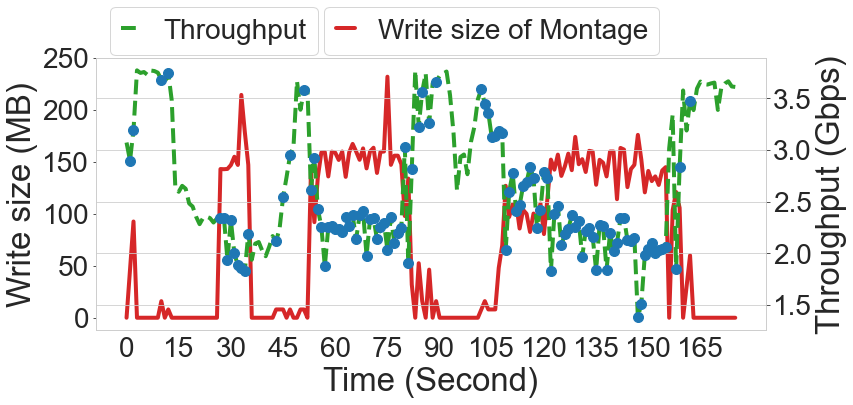

In [114]:
montage_1_df = pd.read_csv("./montage_analysis/montage_1_instance.csv")
montage_5_df = pd.read_csv("./montage_analysis/long_montage_5_instance.csv")
normal_df = pd.read_csv("./montage_analysis/normal.csv")
rows = montage_df.shape[0]

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
# plt.rcParams.update({'font.size': 15})
sns.set_style("whitegrid")
sns.set_palette("Set1")

fig, ax = plt.subplots(figsize =(12, 5))
x_range = np.arange(0, 176 , 1)
lw=4
# markersize=10

ax.set_ylabel('Write size (MB)', fontsize=33)
ax.plot(x_range, montage_5_df.iloc[:176,:]['sender_remote_ost_write_bytes']/(1024 * 1024),'-', label="Write size of Montage",color='tab:red', linewidth=lw)
ax.set_xlabel('Time (Second)', fontsize=33)

plt.yticks(np.arange(0, np.max(montage_5_df.iloc[:176,:]['sender_remote_ost_write_bytes']/(1024 * 1024)) + 50, 50),  fontsize=28)
plt.xticks(np.arange(0, 176 , 15),  fontsize=28)

plt.legend(fontsize=28, framealpha=0.8, handlelength=0.7, loc='upper left', bbox_to_anchor=(0.32, 1.24))
# fig.suptitle('Monitoring agent\'s Resource Usage footprints')

real_writes_x = montage_5_df.loc[(montage_5_df['sender_remote_ost_write_bytes'] > 0)].index
real_writes_y = montage_5_df.loc[(montage_5_df['sender_remote_ost_write_bytes'] > 0)]
# ax.plot(real_writes_x, real_writes_y['through_put'], 'ro',label="While Montage is writing")
ax.grid(False)

ax2 = ax.twinx()
# ax2.set_xticks(np.arange(0, 176 , 15),  fontsize=28)

# ax2.set_yticks(np.arange(0, 4.5, 0.5),  fontsize=28)
plt.yticks(np.arange(0, 4.5, 0.5),  fontsize=28)
ax2.set_ylabel('Throughput (Gbps)', fontsize=33)
# ax2.grid(True,which='both', axis='y', linestyle='--', alpha=0.5)


# ax2.plot(np.arange(0, normal_df.shape[0]  , 1), montage_df.iloc[:normal_df.shape[0],:]['through_put'])
# ax2.plot(np.arange(0, 75  , 1), montage_1_df.iloc[:75]['through_put'], 'x')
# ax2.plot(x_range, normal_df['through_put'], 'mx', label="Normal")
line1, = ax2.plot(x_range, montage_5_df.iloc[:176,:]['through_put'], '--', label="Throughput", color='tab:green', linewidth=lw)
plt.legend(fontsize=28, handles=[line1], handlelength=0.7,  framealpha=0.8, loc='upper left', bbox_to_anchor=(0.0, 1.24))

ax2.plot(real_writes_x[(y_pred == 64)], real_writes_y.iloc[(y_pred == 64)]['through_put'], ls="", marker="o", markersize=10,label="Recognized by model" , color='tab:blue')

# plt.axvline(x=26,linestyle='--', alpha=0.7, color='red') (0.33,0.65,0.41)
# plt.axvline(x=36,linestyle='--', alpha=0.7, color='red')

# plt.axvline(x=52,linestyle='--', alpha=0.7, color='red')
# plt.axvline(x=82,linestyle='--', alpha=0.7, color='red')

# plt.axvline(x=108,linestyle='--', alpha=0.7, color='red')
# plt.axvline(x=158,linestyle='--', alpha=0.7, color='red')

# ax2.grid(True,which='both', axis='y', linestyle='-.', alpha=0.5)

# ax.xaxis.grid()
# ax.grid(axis='x',linestyle='--')
plt.savefig("Real_world_montage.pdf", bbox_inches='tight')


In [257]:
montage_X = montage_df.drop(columns="label_value")[features]
# y_pred = clf.predict(normal.drop(columns="label_value"))
y_pred = clf.predict(montage_X)
# print(Counter(y_pred[:176]))
print(Counter(y_pred))
len(y_pred)
#Counter({64: 114, 73: 47, 82: 44, 46: 22, 91: 12})
#Counter({64: 113, 73: 58, 82: 31, 46: 27, 91: 10})

#Counter({64: 114, 73: 52, 82: 39, 46: 20, 91: 14})

Counter({64: 113, 73: 52, 82: 39, 46: 27, 91: 8})


239

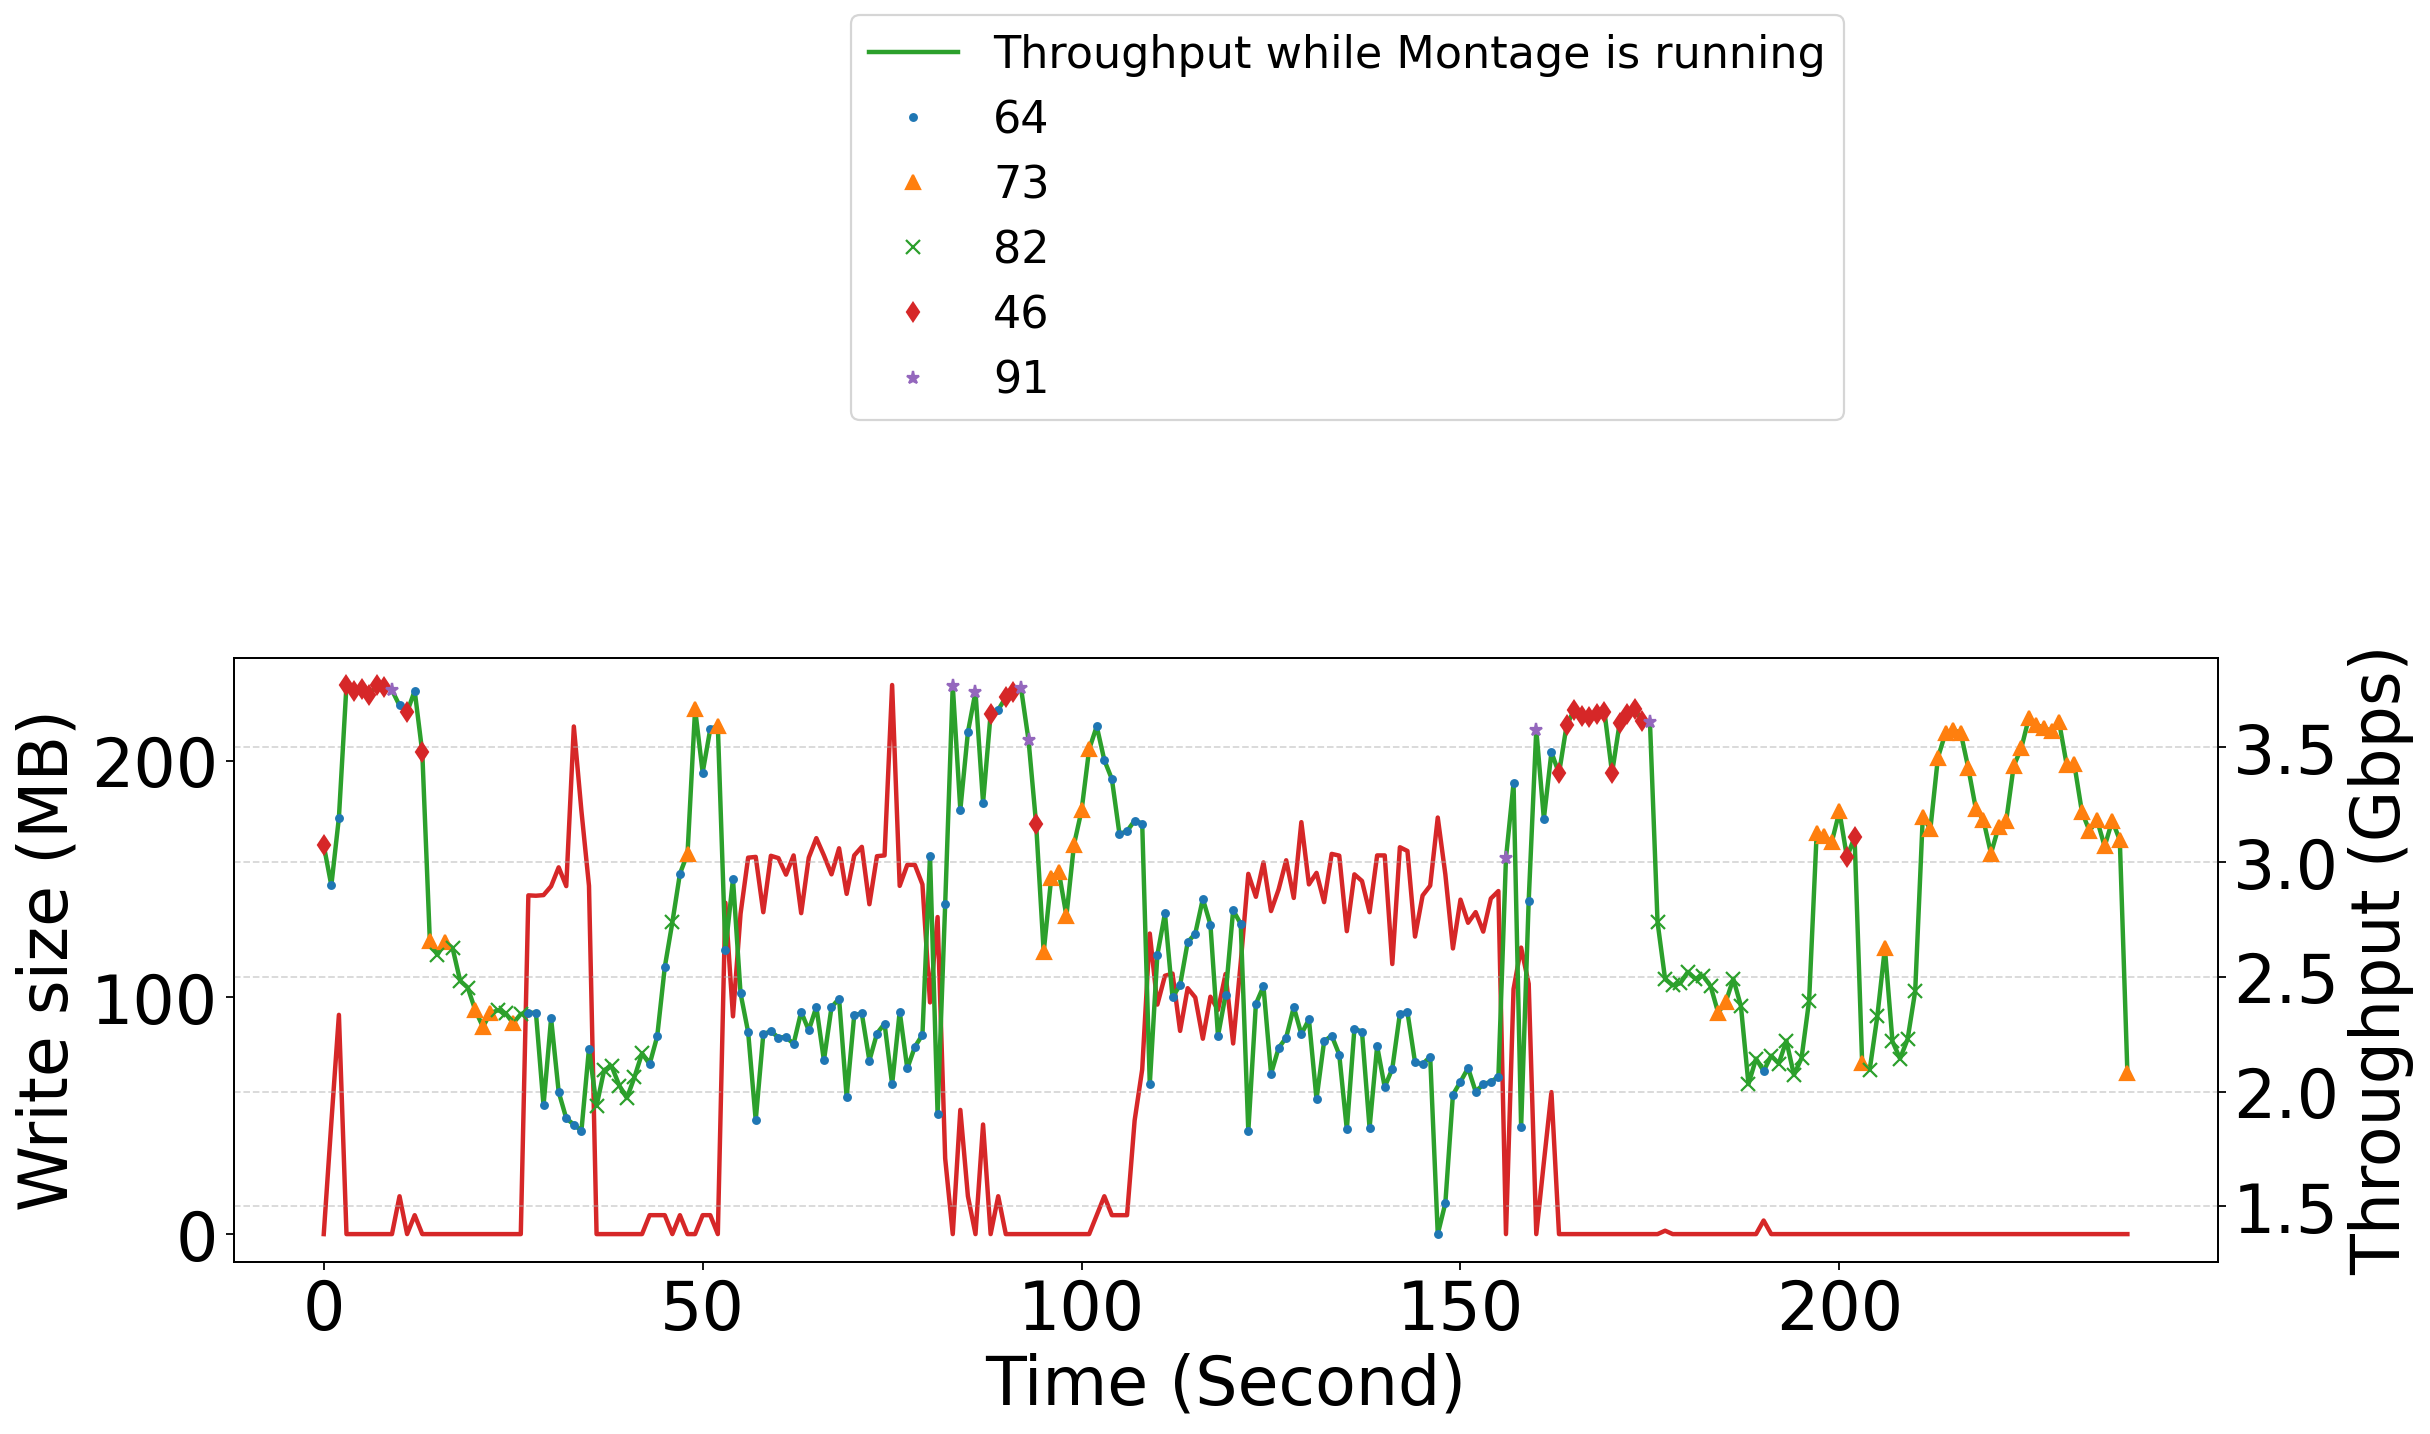

In [264]:

montage_5_df = montage_df.copy()
rows = montage_df.shape[0]

from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 30})

fig, ax = plt.subplots(figsize =(16, 5), dpi=160)
x_range = np.arange(0, 239 , 1)

ax.set_ylabel('Write size (MB)')
ax.plot(x_range, montage_5_df['sender_remote_ost_write_bytes']/(1024 * 1024),'-', label="Write size of Montage",color='tab:red', linewidth=2)
ax.set_xlabel('Time (Second)')

# fig.suptitle('Monitoring agent\'s Resource Usage footprints')

# print(real_writes_x)
ax2 = ax.twinx()
ax2.set_xticks(np.arange(0, 239 , 50))
ax2.set_yticks(np.arange(0, 4.5, 0.5))
ax2.set_ylabel('Throughput (Gbps)')
ax2.grid(True,which='both', axis='y', linestyle='--', alpha=0.5)


line1, = ax2.plot(x_range, montage_5_df.iloc[:239,:]['through_put'], '-', label="Throughput while Montage is running", color='tab:green', linewidth=2)
plt.legend(fontsize=10, handles=[line1], framealpha=0.8, loc='upper left', bbox_to_anchor=(0, 1.2))

#{64: 98, 82: 75, 46: 45, 10: 9, 0: 8, 91: 2, 73: 2}
# x_64 = montage_5_df.loc[y_pred==64].index
# y_64 = montage_5_df.loc[y_pred == 64]
# print(x_64)
#Counter({64: 114, 73: 52, 82: 39, 46: 20, 91: 14})

ax2.plot(montage_5_df.loc[y_pred==64].index,  montage_5_df.loc[y_pred == 64]['through_put'],'.',linewidth=1, label="64")
ax2.plot(montage_5_df.loc[y_pred==73].index,  montage_5_df.loc[y_pred == 73]['through_put'],'^',linewidth=1, label="73")
ax2.plot(montage_5_df.loc[y_pred==82].index,  montage_5_df.loc[y_pred == 82]['through_put'],'x',linewidth=1, label="82")
ax2.plot(montage_5_df.loc[y_pred==46].index,  montage_5_df.loc[y_pred == 46]['through_put'],'d',linewidth=1, label="46")
# ax2.plot(montage_5_df.loc[y_pred==0].index,  montage_5_df.loc[y_pred == 0]['through_put'],'+',linewidth=1, label="0")
ax2.plot(montage_5_df.loc[y_pred==91].index,  montage_5_df.loc[y_pred == 91]['through_put'],'*',linewidth=1, label="91")
# ax2.plot(montage_5_df.loc[y_pred==73].index,  montage_5_df.loc[y_pred == 73]['through_put'],'v',linewidth=1, label="73")


plt.legend(fontsize=20, framealpha=0.8, loc='upper left', bbox_to_anchor=(0.3, 2.1))
# plt.axvline(x=26,linestyle='--', alpha=0.7, color='red') (0.33,0.65,0.41)
# plt.axvline(x=36,linestyle='--', alpha=0.7, color='red')

# plt.axvline(x=52,linestyle='--', alpha=0.7, color='red')
# plt.axvline(x=82,linestyle='--', alpha=0.7, color='red')

# plt.axvline(x=108,linestyle='--', alpha=0.7, color='red')
# plt.axvline(x=158,linestyle='--', alpha=0.7, color='red')

# ax2.grid(True,which='both', axis='y', linestyle='-.', alpha=0.5)

# ax.xaxis.grid()
# ax.grid(axis='x',linestyle='--')


# REAL_WORLD APPLICATION on Utah cluster

In [242]:
utah_ssd_merged = pd.read_csv(filenames.get('utah_ssd_merged')).drop(['time_stamp', 'through_put'], axis=1)

# montage_df = pd.read_csv("normal.csv").drop(['time_stamp', 'through_put'], axis=1)
# wisconsin_ssd_merged = wisconsin_ssd_merged.append(montage_df, ignore_index=True)

df = utah_ssd_merged

y = df.label_value
X = df.drop(columns="label_value")[features] # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
print(X_train.shape)
X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)
print(X_train.shape)
clf = RandomForestClassifier(n_estimators=100)
# clf = make_pipeline(StandardScaler(), clf)
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
print(np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2))

(22613, 24)
(2772, 24)
99.19


In [235]:
normal = df.loc[df['label_value'] == 0]
y_pred = clf.predict(normal.drop(columns="label_value")[features])
# y_pred = clf.predict(normal.drop(columns="label_value"))
print(Counter(y_pred))

Counter({0: 181})


In [236]:
# montage_df = pd.read_csv("normal.csv").drop(['time_stamp', 'through_put'], axis=1)
montage_df = pd.read_csv("./montage_analysis/utah_montage_5_instance.csv").drop(['time_stamp','through_put'], axis=1)
# print(montage_df.shape)
# montage_df = montage_df.iloc[49:56]
# montage_df['sender_remote_ost_write_bytes']
montage_df_write_part = montage_df.loc[(montage_df['sender_remote_ost_write_bytes'] > 0)]
montage_df_write_part
# montage_df

,sender_avg_rtt_value,sender_pacing_rate,sender_cwnd_rate,sender_avg_retransmission_timeout_value,sender_byte_ack,sender_seg_out,sender_retrans,sender_ssthresh_value,sender_segs_in,sender_avg_send_value,...,receiver_setattr_md,receiver_read_page_md,receiver_unlink_md,receiver_avg_dsack_dups_value,receiver_avg_reord_seen,receiver_system_cpu_percent,receiver_system_memory_percent,receiver_remote_ost_read_bytes,receiver_remote_ost_write_bytes,label_value
3,0.185,15651.3,938.0,201.0,511.540741,370950.0,0.0,20.0,2141.0,58734.0,...,0,0,0,0.0,0.0,2.6,3.0,0,503316480,1002
7,0.399,15651.3,1195.0,201.0,516.000000,374027.0,0.0,20.0,1576.0,34693.9,...,0,0,0,0.0,0.0,2.5,3.2,0,494927872,1002
9,0.364,15651.3,939.0,201.0,521.301918,377612.0,0.0,846.0,1530.0,29882.9,...,0,0,0,0.0,0.0,2.6,3.3,0,511705088,1002
18,0.209,926.9,836.0,201.0,504.194321,365424.0,0.0,786.0,1807.0,46336.0,...,0,0,0,0.0,0.0,2.4,3.8,0,528478656,1002
19,0.367,926.9,896.0,201.0,521.825790,378521.0,0.0,786.0,1656.0,28281.4,...,0,0,0,0.0,0.0,2.5,3.8,0,511705088,1002
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
126,0.292,1237.0,851.0,201.0,542.212105,392310.0,0.0,718.0,1514.0,33760.2,...,0,0,0,0.0,0.0,2.6,8.7,0,545259520,1002
127,0.213,1237.0,890.0,201.0,344.000000,249288.0,0.0,718.0,1473.0,48402.6,...,0,0,0,0.0,0.0,2.0,8.8,0,440401920,1002
128,0.378,1237.0,940.0,201.0,400.000000,289946.0,0.0,718.0,1481.0,28806.8,...,0,0,0,0.0,0.0,1.8,8.8,0,364904448,1002
131,0.385,1237.0,1138.0,201.0,520.000000,376845.0,0.0,718.0,1289.0,34240.5,...,0,0,0,0.0,0.0,2.6,9.0,0,503316480,1002


In [243]:
montage_X = montage_df_write_part.drop(columns="label_value")[features]
# y_pred = clf.predict(normal.drop(columns="label_value"))
y_pred = clf.predict(montage_X)
print(Counter(y_pred))
# len(y_pred)
# print(30/102)

Counter({64: 48, 157: 31, 10: 3, 0: 2})


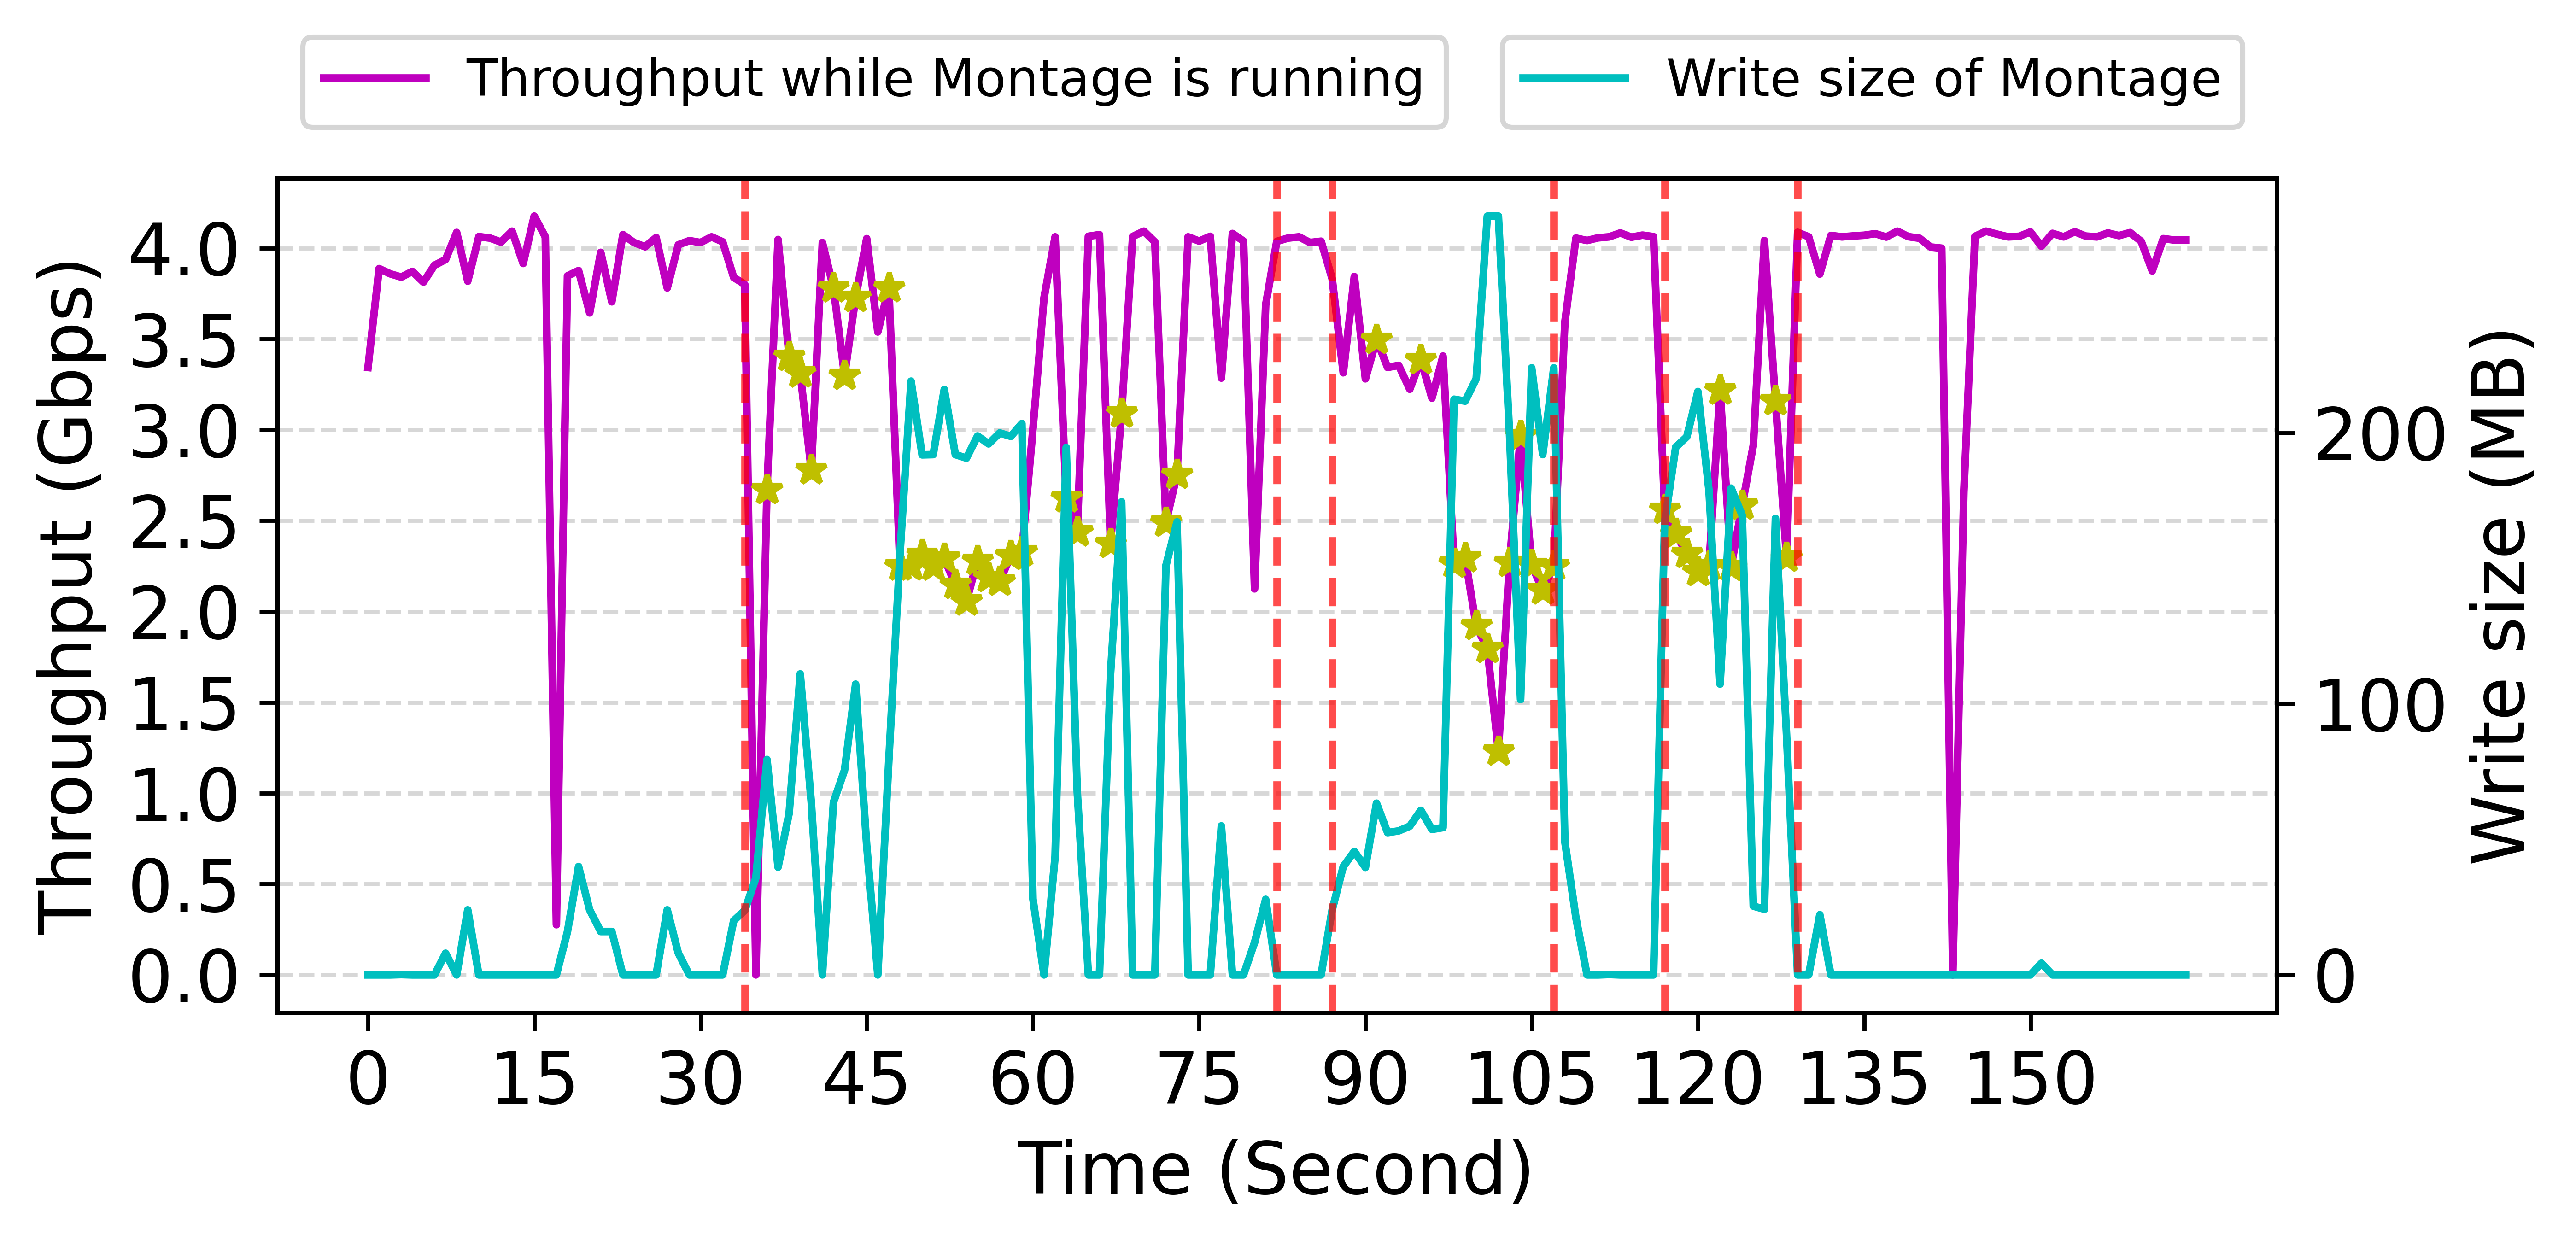

In [246]:
montage_5_df = pd.read_csv("./montage_analysis/utah_montage_5_instance.csv")
# rows = 210
rows = 165

from matplotlib.pyplot import figure
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})

fig, ax = plt.subplots(figsize =(7, 3), dpi=800)
# fig.suptitle('Monitoring agent\'s Resource Usage footprints')
ax.set_xticks(np.arange(0, rows , 15))
ax.set_yticks(np.arange(0, 4.5, 0.5))
ax.set_ylabel('Throughput (Gbps)')
ax.set_xlabel('Time (Second)')
ax.grid(True,which='both', axis='y', linestyle='--', alpha=0.5)
x_range = np.arange(0, rows , 1)

# ax.plot(np.arange(0, normal_df.shape[0]  , 1), montage_df.iloc[:normal_df.shape[0],:]['through_put'])
# ax.plot(np.arange(0, 75  , 1), montage_1_df.iloc[:75]['through_put'], 'x')
# ax.plot(x_range, normal_df['through_put'], 'mx', label="Normal")
line1, = ax.plot(x_range, montage_5_df.iloc[:rows,:]['through_put'], 'm-', label="Throughput while Montage is running")
real_writes_x = montage_5_df.loc[(montage_5_df['sender_remote_ost_write_bytes'] > 0)].index
real_writes_y = montage_5_df.loc[(montage_5_df['sender_remote_ost_write_bytes'] > 0)]
# ax.plot(real_writes_x, real_writes_y['through_put'], 'ro',label="While Montage is writing")

ax.plot(real_writes_x[y_pred == 64], real_writes_y.iloc[y_pred == 64]['through_put'], 'y*',linewidth=0.5, label="Recognized by model" )

plt.legend(handles=[line1], framealpha=0.8, loc='upper left', prop={"size":10}, bbox_to_anchor=(0, 1.2))


ax2 = ax.twinx()
ax2.set_ylabel('Write size (MB)')
ax2.plot(x_range, montage_5_df.iloc[:rows,:]['sender_remote_ost_write_bytes']/(1024 * 1024),'c-' , label="Write size of Montage")
plt.axvline(x=34,linestyle='--', alpha=0.7, color='red')
plt.axvline(x=82,linestyle='--', alpha=0.7, color='red')
#
plt.axvline(x=87,linestyle='--', alpha=0.7, color='red')
plt.axvline(x=107,linestyle='--', alpha=0.7, color='red')
#
plt.axvline(x=117,linestyle='--', alpha=0.7, color='red')
plt.axvline(x=129,linestyle='--', alpha=0.7, color='red')

# ax2.grid(True,which='both', axis='y', linestyle='-.', alpha=0.5)
plt.legend(framealpha=0.8, loc='upper left', prop={"size":10}, bbox_to_anchor=(0.6, 1.2))
# ax.xaxis.grid()
# ax.grid(axis='x',linestyle='--')
# plt.savefig("utah_Real_world_montage.pdf", bbox_inches='tight')

In [287]:
datasets = ['emulab_hdd_merged', 'utah_ssd_merged', 'wisconsin_ssd_merged', 'utah_ssd_merged_1g', 'wisconsin_hdd_ssd_merged']
all_accuracies = {}
for key in datasets:
    df = pd.read_csv(filenames.get(key)).drop(['time_stamp', 'through_put'], axis=1)
    accuracies = []
    for n in range(5,70,5):
        train = df.groupby("label_value").sample(n)
        test = df.drop(train.index)
        y_train = train.label_value
        X_train = train[features]
        y_test = test.label_value
        X_test = test[features]
        clf = make_pipeline(StandardScaler(), RandomForestClassifier(n_estimators=100))
        clf.fit(X_train, y_train)
        y_pred = clf.predict(X_test)
        acc = np.round(metrics.accuracy_score(y_test, y_pred) * 100, 2)
        accuracies.append(acc)
        # print()
        # print(f"{key},{n},{np.round(metrics.f1_score(y_test, y_pred, average='weighted') * 100, 2)}")
        # print(f"{key},{n},{acc}")
    all_accuracies[key] = accuracies
print(all_accuracies)

{'emulab_hdd_merged': [77.08, 85.49, 85.58, 87.87, 88.26, 88.69, 89.81, 89.78, 90.57, 92.35, 92.38, 91.85, 92.85], 'utah_ssd_merged': [88.58, 92.82, 95.34, 96.29, 96.77, 97.64, 97.15, 97.68, 96.45, 97.73, 97.75, 97.44, 98.29], 'wisconsin_ssd_merged': [86.67, 91.13, 93.14, 94.63, 95.09, 95.2, 95.56, 96.19, 96.36, 96.05, 96.48, 96.72, 96.43], 'utah_ssd_merged_1g': [90.94, 97.14, 97.03, 97.81, 97.94, 98.61, 98.09, 98.57, 99.08, 98.93, 98.98, 98.59, 99.09], 'wisconsin_hdd_ssd_merged': [85.34, 90.62, 93.13, 94.45, 94.14, 95.39, 95.25, 95.68, 96.59, 96.68, 95.95, 96.59, 97.17]}


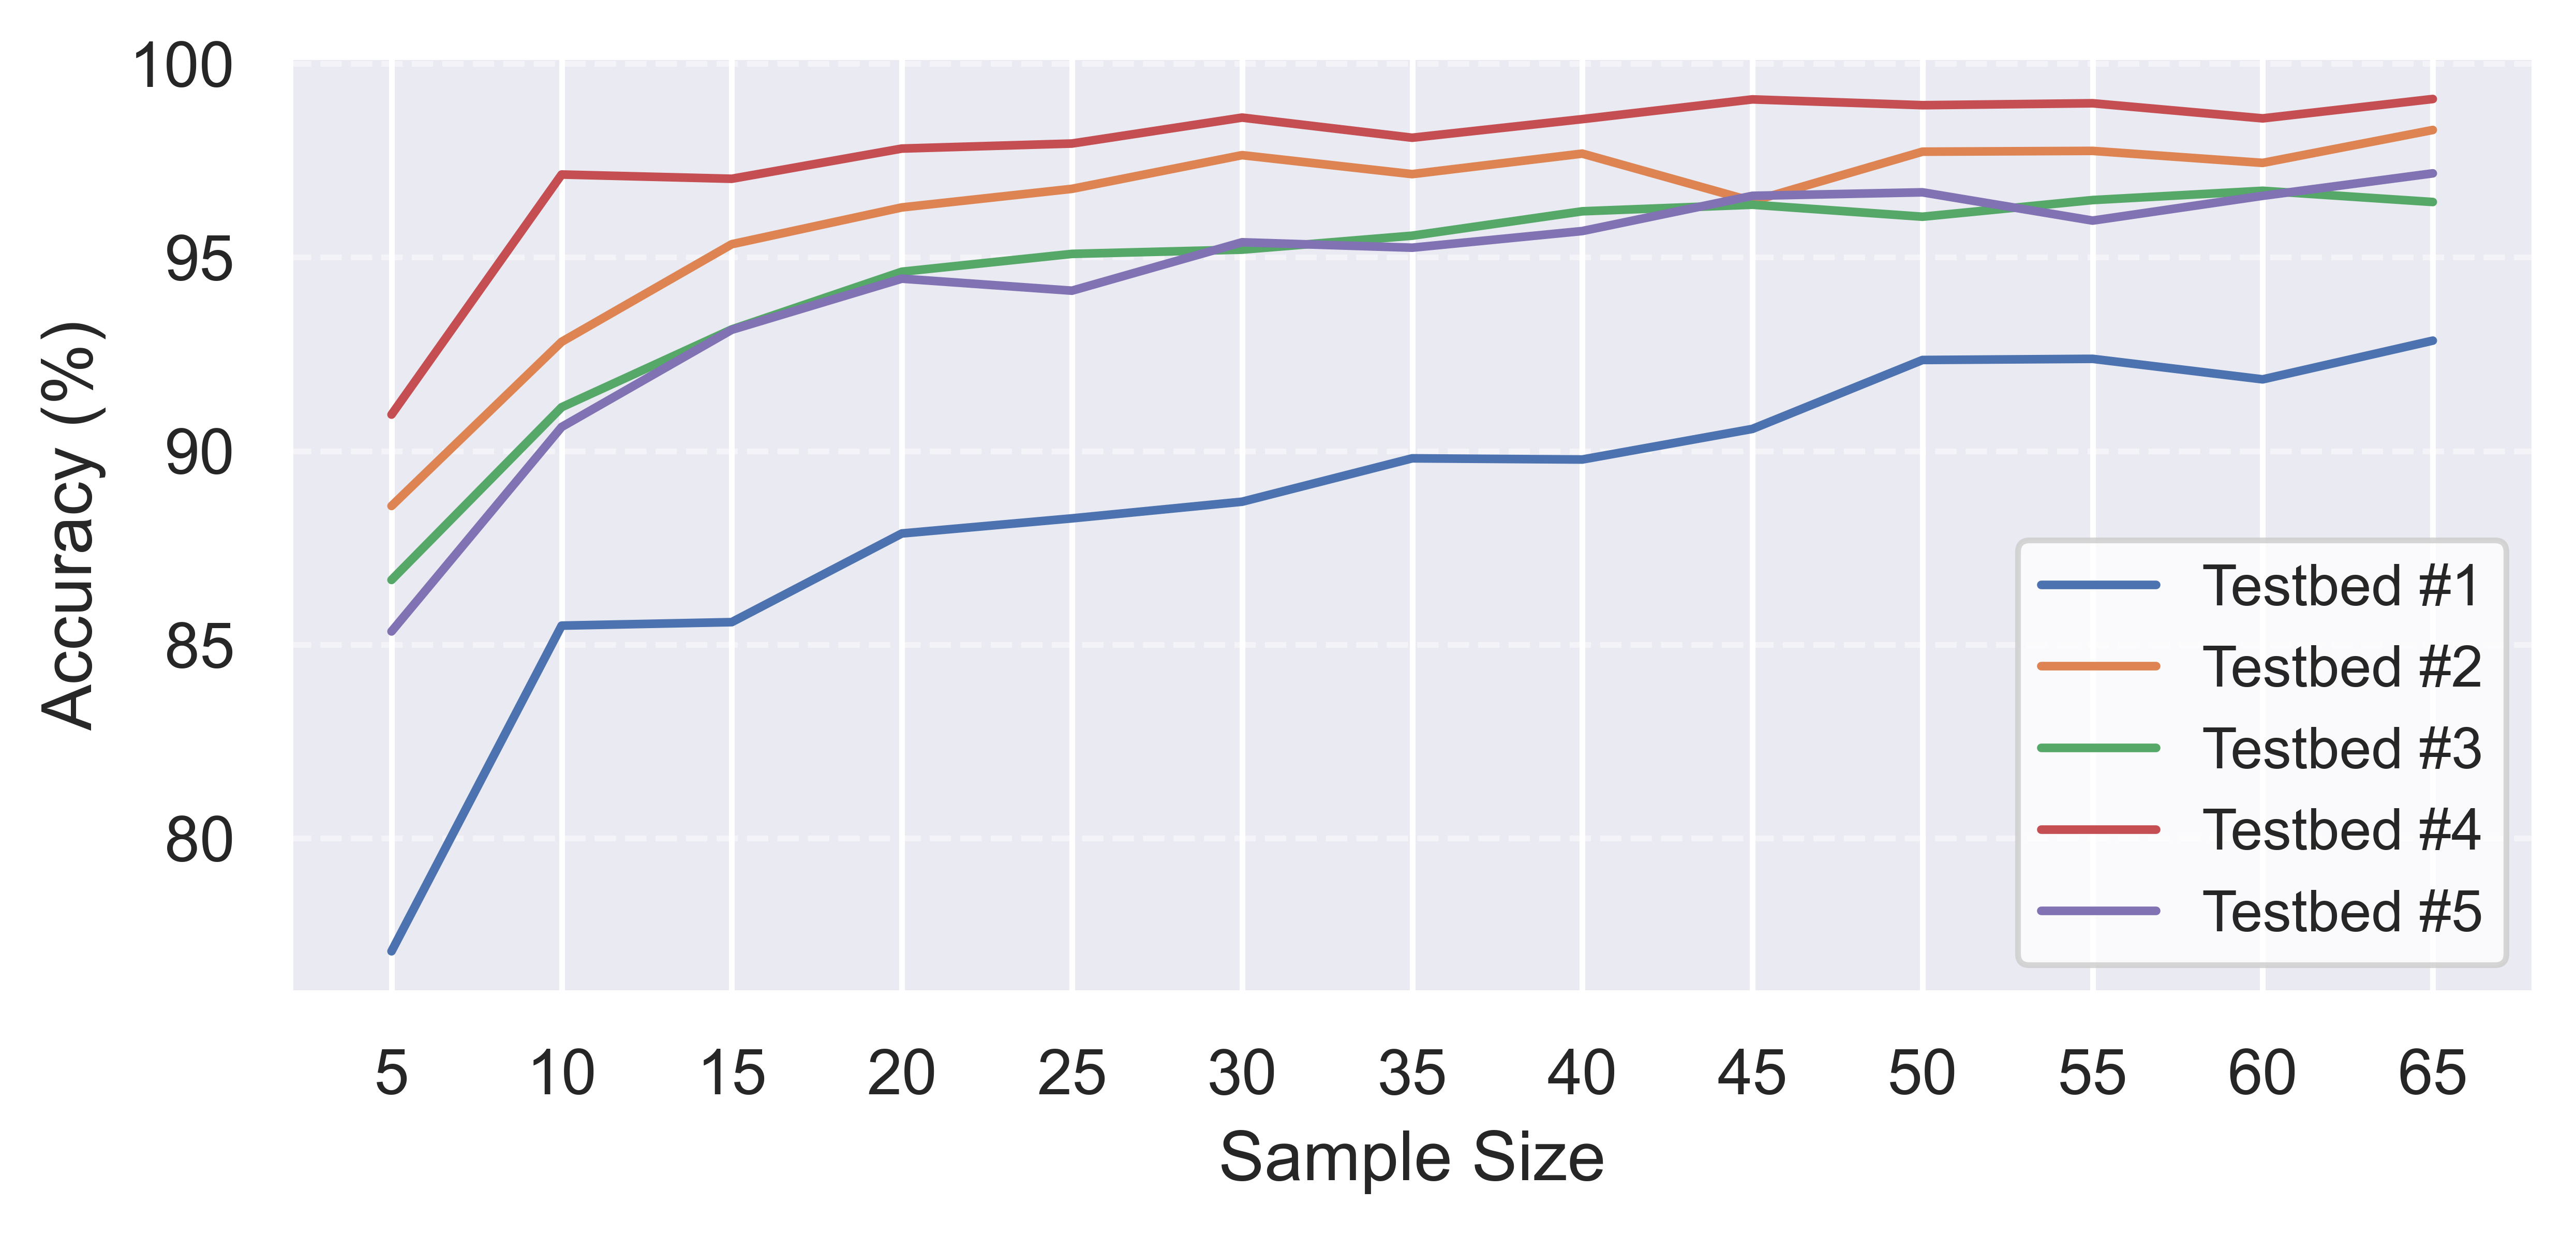

In [289]:
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 14})
labels = {'emulab_hdd_merged': 'Testbed #1', 'utah_ssd_merged':'Testbed #2',
          'wisconsin_ssd_merged':'Testbed #3', 'utah_ssd_merged_1g':'Testbed #4',
          'wisconsin_hdd_ssd_merged':'Testbed #5'}
fig, ax = plt.subplots(figsize =(7, 3), dpi=800)
sns.set_style("whitegrid")
sns.set_palette("Set1")
# fig.suptitle('Monitoring agent\'s Resource Usage footprints')
ax.set_xticks(np.arange(0, 69 , 5))
ax.set_yticks(np.arange(65, 105, 5))
ax.set_ylabel('Accuracy (%)')
ax.set_xlabel('Sample Size')
ax.grid(True,which='both', axis='y', linestyle='--', alpha=0.5)
x_range = np.arange(5, 70 , 5)

for ds in all_accuracies.keys():
    ax.plot(x_range, all_accuracies[ds], label=labels[ds])
plt.legend(framealpha=0.8, loc='lower right', prop={"size":10})


##

In [252]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
# ['sender_avg_rtt_value', 'sender_cwnd_rate', 'sender_seg_out', 'sender_ssthresh_value', 'sender_segs_in', 'sender_avg_send_value', 'sender_vsize', 'sender_rss', 'sender_mem_usage_percentage', 'sender_avg_waittime_md', 'sender_system_cpu_percent', 'receiver_seg_out', 'receiver_segs_in', 'receiver_read_bytes_io', 'receiver_vsize', 'receiver_rss', 'receiver_mem_usage_percentage', 'receiver_req_active', 'receiver_avg_waittime_md', 'receiver_system_cpu_percent']

df = pd.read_csv(filenames.get('wisconsin_hdd-ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
normal_ave = np.average(df[df['label_value']==0]['sender_avg_rtt_value'])
# a = df.groupby("label_value").sender_avg_rtt_value.agg(["mean", "std"])
# a = df.groupby("label_value").sender_avg_rtt_value.agg(["mean"])
# b = df.groupby("label_value").sender_avg_rtt_value.agg(["max"])
# for index, row in a.iterrows():
#     print(row['mean'], b.iloc[index]['max'], row['mean'] / b.iloc[index]['max'])



0.42246 0.636 0.6642452830188679
0.21880625 0.742 0.2948871293800539
0.2513148148148148 1.12 0.2243882275132275
0.2502327044025157 0.612 0.40887696797796685
0.2723375 0.589 0.46237266553480477
0.43639999999999995 1.046 0.41720841300191197
0.3319575757575758 0.533 0.6228097106145887
0.37124223602484474 0.529 0.701781164508213
0.2795060240963856 0.488 0.5727582460991508
0.3329940119760479 0.543 0.6132486408398672
0.39668152866242035 0.595 0.6666916448107906
0.4229025974025974 0.632 0.6691496794344896
0.4383311258278146 0.668 0.6561843201015188
0.44176 0.936 0.47196581196581194
0.48170198675496684 1.11 0.43396575383330344
0.4515612903225807 0.927 0.4871211330340676
0.4109870967741936 0.672 0.6115879416282642
0.5033032258064516 1.128 0.44619080301990394
0.43446451612903225 0.853 0.5093370646295806
0.6835539568345324 22.135 0.03088113651838863
0.4567007299270073 0.954 0.478721939126842
0.5630144927536231 16.719 0.03367512965809098
0.4755289855072464 0.69 0.6891724427641253
0.461386861313868

In [249]:
# df = pd.read_csv(filenames.get('utah_ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
# df = pd.read_csv(filenames.get('utah_ssd_unmerged_1g')).drop(['time_stamp', 'through_put'], axis=1)
df = pd.read_csv(filenames.get('emulab_hdd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)
# df = pd.read_csv(filenames.get('wisconsin_hdd-ssd_unmerged')).drop(['time_stamp', 'through_put'], axis=1)

normal_ave = np.average(df[df['label_value']==0]['sender_avg_rtt_value'])
df.groupby("label_value").sender_avg_rtt_value.agg(["mean", "std"]) / normal_ave



,mean,std
label_value,,
0,1.000000,2.922133
1,1.166419,3.821980
2,0.408823,0.464278
3,0.350276,0.177804
4,0.351881,0.127565
...,...,...
156,0.297774,0.862105
157,2.319232,1.082487
158,4.167337,1.330920


In [67]:
from hmmlearn.base import ConvergenceMonitor

emul_df = pd.read_csv(filenames.get('emulab_hdd_merged')).drop(['time_stamp', 'through_put'], axis=1)
from hmmlearn import hmm
remodel = hmm.GaussianHMM(n_components=21, covariance_type="diag", n_iter=100)
# temp_probs = np.zeros(21)
# temp_probs[0] = 1
# remodel.startprob_ = temp_probs
# remodel.covars_ = np.tile(np.identity(2), (3, 1, 1))

y = emul_df.label_value
X = emul_df.drop(columns="label_value")#[features] # df[features]
X_train, X_test, y_train, y_test = train_test_split(X,y)
# X_train, y_train = RandomUnderSampler(sampling_strategy="all").fit_resample(X_train, y_train)

remodel.monitor_ = ConvergenceMonitor(n_iter=100,tol=0.01,verbose=False,)


remodel.fit(X_train)
# Z = remodel.predict(X_test)

Some rows of transmat_ have zero sum because no transition from the state was ever observed.


GaussianHMM(n_components=21, n_iter=100)

In [68]:
 # Z = remodel.predict(X_test)
# remodel.startprob_
# remodel.transmat_
# remodel.monitor_
# print(Z)
# print(y_test)

ValueError: transmat_ rows must sum to 1 (got [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0.])